<a id="intro"></a>
# Исследование приложения Procrastinate Pro+

**Описание проекта**

Заказчик — отдел маркетинга развлекательного приложения Procrastinate Pro+. 

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Необходимо разобраться в причинах и помочь компании выйти в плюс.

**Цели исследования**:
1. [Откуда приходят пользователи и какими устройствами они пользуются](#data_analysis)
2. [Сколько стоит привлечение пользователей из различных рекламных каналов](#marketing)
3. [Сколько денег приносит каждый клиент](#revenue_calc)
4. [Когда расходы на привлечение клиента окупаются](#revenue_region)
5. [Какие факторы мешают привлечению клиентов](#revenue_channel)

 👉 **[Итоги исследования здесь](#research_results)**

**Описание данных**

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

Лог сервера с информацией о посещениях сайта — таблица `visits_info_short.csv`
- `User Id` — уникальный идентификатор пользователя,
- `Region` — страна пользователя,
- `Device` — тип устройства пользователя,
- `Channel` — идентификатор источника перехода,
- `Session Start` — дата и время начала сессии,
- `Session End` — дата и время окончания сессии.

Информация о заказах — таблица `orders_info_short.csv`
- `User Id` — уникальный идентификатор пользователя,
- `Event Dt` — дата и время покупки,
- `Revenue` — сумма заказа.

Информация о расходах на рекламу — таблица `costs_info_short.csv`
- `dt` — дата проведения рекламной кампании,
- `Channel` — идентификатор рекламного источника,
- `costs` — расходы на эту кампанию.

## Общая информация о данных

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import os
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
import matplotlib.ticker as mticker

In [2]:
# чтение файла с данными и сохранение в соответствующие датафреймы
dir1 = '/datasets/'
dir2 = '/Users/alexslobodskoj/Data_Analyst/'
visits_pth = 'visits_info_short.csv'
orders_pth = 'orders_info_short.csv'
costs_pth = 'costs_info_short.csv'

if os.path.exists(dir1):
    df_visits, df_orders, df_costs = (
        pd.read_csv(dir1 + visits_pth),
        pd.read_csv(dir1 + orders_pth),
        pd.read_csv(dir1 + costs_pth)
    )
elif os.path.exists(dir2):
    df_visits, df_orders, df_costs = (
        pd.read_csv(dir2 + visits_pth),
        pd.read_csv(dir2 + orders_pth),
        pd.read_csv(dir2 + costs_pth)
    )
else:
    print('Something is wrong')

In [3]:
# датафрейм о посещениях `df_visits`
# вывод первых 5 строк 
display(df_visits.head())

# вывод основной информации
df_visits.info()

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


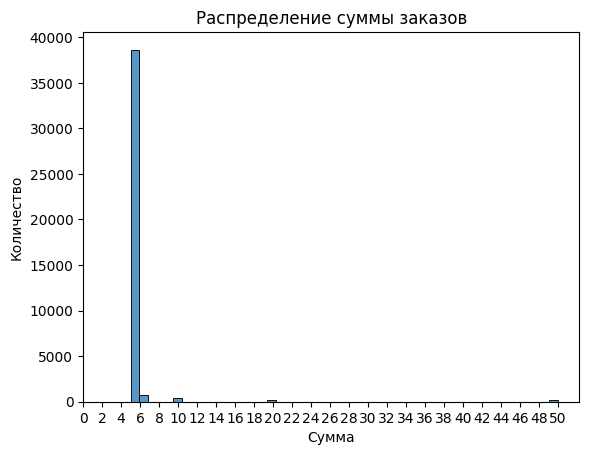

In [4]:
# датафрейм о покупках `df_orders`
# вывод первых 5 строчек 
display(df_orders.head())

# вывод основной информации
df_orders.info()

# гистограмма для столбца `Revenue`
sns.histplot(df_orders['Revenue'], bins=50)
plt.title('Распределение суммы заказов')
plt.ylabel('Количество')
plt.xlabel('Сумма')
plt.xticks(ticks=np.arange(0, 51, 2))
plt.show()

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


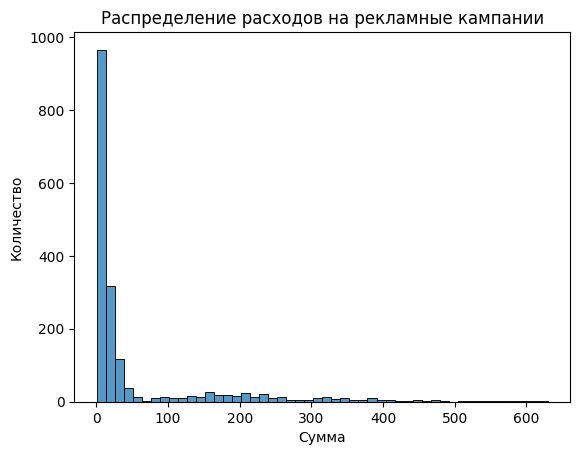

In [5]:
# датафрейм о расходах `df_costs`
# вывод 5 строчек 
display(df_costs.head())

# вывод основной информации
df_costs.info()

# гистограмма для столбца `costs`
sns.histplot(df_costs['costs'], bins=50)
plt.title('Распределение расходов на рекламные кампании')
plt.ylabel('Количество')
plt.xlabel('Сумма')
plt.show()

<div style="border:solid gray 1px; padding: 20px">

**Выводы:**
- необходимо изменить названия столбцов (нижний регистр, подчеркивание)
  
- в таблицах нет пропущенных значений

- в столбцах `Session Start`, `Session End`, `Event Dt`, `dt` необходимо изменить тип данных

- необходимо проверить таблицы на наличие дубликатов

## Предобработка данных

### Переименование столбцов

Приведем названия столбцов в нижний регистр и заменим пробел на `_`

In [6]:
# создание словаря датафреймов
dataframes = {'df_visits': df_visits, 'df_orders': df_orders, 'df_costs': df_costs}

# цикла для обработки датафреймов
for name, df in dataframes.items():
    df.columns = [x.lower().replace(' ', '_') for x in df.columns.values]

### Изменение типа данных

- в столбцах `session_start`, `session_end` таблицы `df_visits` и столбце `event_dt` таблицы `df_orders` необходимо изменить тип данных с текстового на DateTime
- в столбце `dt` таблицы `df_costs` необходимо изменить тип данных с текстового на Date

In [7]:
# изменение типа данных в соотв. столбцах
df_visits['session_start'] = pd.to_datetime(df_visits['session_start'])
df_visits['session_end'] = pd.to_datetime(df_visits['session_end'])
df_orders['event_dt'] = pd.to_datetime(df_orders['event_dt'])
df_costs['dt'] = pd.to_datetime(df_costs['dt']).dt.date

### Проверка наличия дубликатов

Проверим наличие явных дубликатов

In [8]:
# вывод названий таблиц и количество явных дубликатов в них
for name, df in dataframes.items():
    if df.duplicated().sum() > 0:
        display(
            Markdown(
                f'**{df.duplicated().sum()}**'
                f' явных дубликатов строк в таблице: '
                f'{name}')
        )
    else:
        display(
            Markdown(
                f'Нет явных дубликатов в таблице: '
                f'{name}')
        )

Нет явных дубликатов в таблице: df_visits

Нет явных дубликатов в таблице: df_orders

Нет явных дубликатов в таблице: df_costs

Проверим наличие неявных дубликатов в столбцах `region`, `device`, `channel` таблицы `df_visits` и столбце `channel` таблицы `df_costs`

In [9]:
# вывод отсортированного уникального списка значений в 'region'
display(df_visits['region'].sort_values().unique())

# вывод отсортированного уникального списка значений в 'device'
display(df_visits['device'].sort_values().unique())

# вывод отсортированного уникального списка значений в 'channel'
display(df_visits['channel'].sort_values().unique())

# вывод отсортированного уникального списка значений в 'channel'
display(df_costs['channel'].sort_values().unique())

array(['France', 'Germany', 'UK', 'United States'], dtype=object)

array(['Android', 'Mac', 'PC', 'iPhone'], dtype=object)

array(['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado',
       'OppleCreativeMedia', 'RocketSuperAds', 'TipTop', 'WahooNetBanner',
       'YRabbit', 'lambdaMediaAds', 'organic'], dtype=object)

array(['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado',
       'OppleCreativeMedia', 'RocketSuperAds', 'TipTop', 'WahooNetBanner',
       'YRabbit', 'lambdaMediaAds'], dtype=object)

Неявных дубликатов не обнаружено.

Проверим наличие дубликатов сессий пользователя -  в сочетании столбцов `user_id + session_start` таблицы `df_visits`.

In [10]:
# поиск дублей
if (df_visits.groupby(['user_id', 'session_start'])['user_id'].transform('size') > 1).any():
    display(
        Markdown(
            f'Есть дубликаты в сочетании столбцов `user_id + session_start` в таблице: `df_visits`'
        )
    )
else:
    display(
        Markdown(
            f'Нет дубликатов в сочетании столбцов `user_id + session_start`  в таблице: `df_visits`'
        )
    )

Нет дубликатов в сочетании столбцов `user_id + session_start`  в таблице: `df_visits`

Проверим наличие дубликатов покупок пользователя - в сочетании столбцов `user_id + event_dt` таблицы `df_orders`.

In [11]:
# поиск дублей
if (df_orders.groupby(['user_id', 'event_dt'])['user_id'].transform('size') > 1).any():
    display(
        Markdown(
            f'Есть дубликаты в сочетании столбцов `user_id + event_dt` в таблице: `df_orders`'
        )
    )
else:
    display(
        Markdown(
            f'Нет дубликатов в сочетании столбцов `user_id + event_dt`  в таблице: `df_orders`'
        )
    )

Нет дубликатов в сочетании столбцов `user_id + event_dt`  в таблице: `df_orders`

Проверим наличие дубликатов рекламных источников - в сочетании столбцов `channel + dt` таблицы `df_costs`.

In [12]:
# поиск дублей
if (df_costs.groupby(['channel', 'dt'])['channel'].transform('size') > 1).any():
    display(
        Markdown(
            f'Есть дубликаты в сочетании столбцов `channel + dt` в таблице: `df_costs`'
        )
    )
else:
    display(
        Markdown(
            f'Нет дубликатов в сочетании столбцов `channel + dt`  в таблице: `df_costs`'
        )
    )

Нет дубликатов в сочетании столбцов `channel + dt`  в таблице: `df_costs`

### Проверка наличия аномальных значений

Проверим **минимальные и максимальные даты для анализа** во всех таблицах

In [13]:
# даты для df_visits
display(
    Markdown(
        f'В таблице `df_visits` min дата= {df_visits["session_start"].dt.date.min()} и' 
        f' max дата= {df_visits["session_start"].dt.date.max()}'
    )
)

# даты для df_orders
display(
    Markdown(
        f'В таблице `df_orders` min дата= {df_orders["event_dt"].dt.date.min()} и' 
        f' max дата= {df_orders["event_dt"].dt.date.max()}'
    )
)
# даты для df_costs
display(
    Markdown(
        f'В таблице `df_costs` min дата= {df_costs["dt"].min()} и' 
        f' max дата= {df_costs["dt"].max()}'
    )
)

В таблице `df_visits` min дата= 2019-05-01 и max дата= 2019-10-31

В таблице `df_orders` min дата= 2019-05-01 и max дата= 2019-10-31

В таблице `df_costs` min дата= 2019-05-01 и max дата= 2019-10-27

Проверим **наличие ошибки**: `session_end` больше `session_start` в `df_visits`

In [14]:
# проверка на ошибки
errors_row = df_visits.query('session_end < session_start')
if len(errors_row):
    display(errors_row)
else:
    display(
        Markdown(
            f'В таблице `df_visits` нет строк, в которых окончание сессии было раньше'
        )
    )

В таблице `df_visits` нет строк, в которых окончание сессии было раньше

Проверим **нулевые и отрицательные** суммы заказов в `df_orders` и расходов на рекламные кампании в `df_costs`

In [15]:
# проверка `df_orders`
errors_row = df_orders.query('revenue <= 0')
if len(errors_row):
    display(errors_row)
else:
    display(
        Markdown(
            f'В таблице `df_orders` нет строк c нулевыми и отрицательными суммами заказов'
        )
    )

# проверка `df_costs`
errors_row = df_costs.query('costs <= 0')
if len(errors_row):
    display(errors_row)
else:
    display(
        Markdown(
            f'В таблице `df_costs` нет строк c нулевыми и отрицательными'
            f' расходами на рекламные кампании'
        )
    )

В таблице `df_orders` нет строк c нулевыми и отрицательными суммами заказов

В таблице `df_costs` нет строк c нулевыми и отрицательными расходами на рекламные кампании

### Создание функций для анализа и построения графиков

In [16]:
# функция для создания пользовательских профилей
def get_profiles(sessions, orders, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(        
            first_ts=('session_start', 'first'),
            channel=('channel', 'first'),
            device=('device', 'first'),
            region=('region', 'first')
        )
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg(unique_users=('user_id', 'nunique'))
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [17]:
# функция для расчёта LTV и ROI
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [18]:
# функция для сглаживания фрейма
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [19]:
# функция для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [20]:
# функция для расчёта конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [21]:
# функция для визуализации конверсии
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [22]:
# функция для расчёта удержания
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [23]:
# функция для визуализации удержания
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

<div style="border:solid gray 1px; padding: 20px">

**Выводы**:

- названия столбцов переименованы в соответствиии с общепринятыми правилами
  
- у соответствующих столбцов изменен тип данных для корректного анализа

- явные и неявные дубликаты в таблицах не обнаружены

- созданы функции для дальнейшего анализа и построения графиков

- необходимо учесть, что в `df_visits` и `df_orders` max дата 2019-10-31, в то время как в `df_costs` - 2019-10-27 

<a id="data_analysis"></a>
## Исследовательский анализ данных

### Профили пользователей

Сформируем профили пользователей. Для этого вызовем функцию `get_profiles()`, передав ей данные о посещениях, покупках и расходах на рекламу из соответствующих датафремов.

In [24]:
# формирование профилей пользователей
profiles = get_profiles(df_visits, df_orders, df_costs)

# вывод первых 5 строчек
profiles.head() 

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

Определим минимальную и максимальную даты привлечения пользователей.

In [25]:
# запись информации о датах в переменные
min_analysis_date = profiles['dt'].min()
max_analysis_date = profiles['dt'].max()

# вывод информации о датах
display(
    Markdown(
        f'Минимальная дата привлечения пользователей: **{min_analysis_date}**\n\n'
        f'Максимальная дата привлечения пользователей: **{max_analysis_date}**'
    ) 
)

Минимальная дата привлечения пользователей: **2019-05-01**

Максимальная дата привлечения пользователей: **2019-10-27**

<div style="border:solid gray 1px; padding: 20px">

**Выводы**
1. Сформировали таблицу с профилями пользователей

2. Профили пользователей доступны для анализа с 1 мая 2019 года по 27 октября 2019 года и совпадают с датами, указанными отделом маркетинга для анализа

### Анализ стран пользователей

Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Для этого построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [26]:
# количество пользователей и доля платящих по странам
profiles_agg = (
    profiles.groupby('region')
    .agg(
        {
            'user_id': 'count',
            'payer': lambda x: round(x.mean() * 100,2)
        }
    )
    .reset_index()
    .sort_values(by='user_id', ascending=False)
    .rename(columns=
            {
                'region': 'Страна',
                'user_id': 'Количество пользователей',
                'payer': 'Доля платящих пользователей, %'
            }
           )
)
profiles_agg

Страна  Количество пользователей  Доля платящих пользователей, %
3  United States                    100002                            6.90
2             UK                     17575                            3.98
0         France                     17450                            3.80
1        Germany                     14981                            4.11

Оценим распределение пользователей и плательшиков по странам на графиках

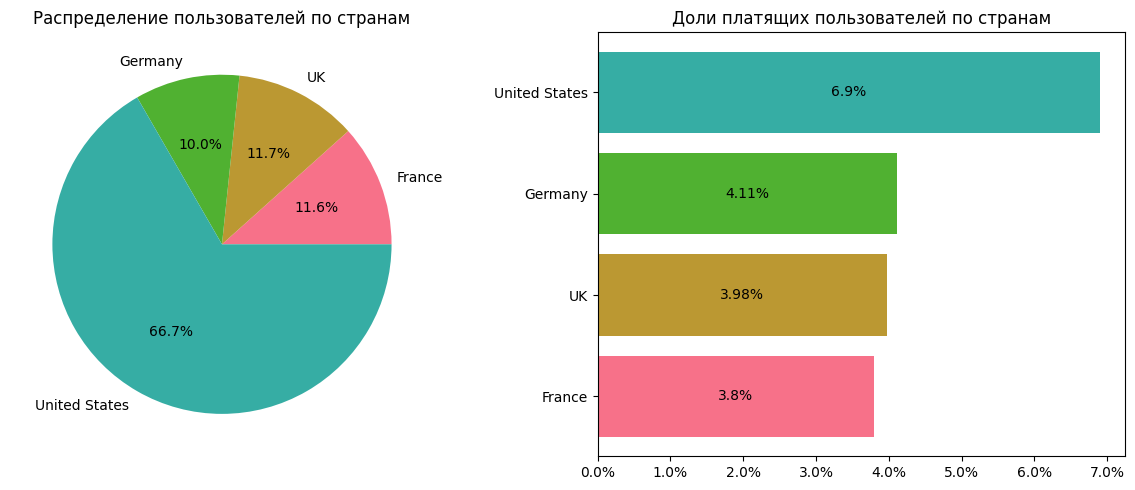

In [27]:
# сортировка для графика
profiles_agg = profiles_agg.sort_values(by='Доля платящих пользователей, %', ascending=True)

# создание матрицы диаграмм
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# вывод круговой диаграммы для`profiles_agg` 
axs[0].pie(
    profiles_agg['Количество пользователей'],
    autopct='%1.1f%%',
    labels=profiles_agg['Страна'],
    colors=sns.color_palette("husl")
)
axs[0].set_title('Распределение пользователей по странам')

# вывод горизонтальной столбчатой диаграммы для `profiles_agg`
hbars = axs[1].barh(
    y=profiles_agg['Страна'],
    width=profiles_agg['Доля платящих пользователей, %'],
    color=sns.color_palette("husl"),
)
axs[1].bar_label(hbars,label_type='center', fmt='{}%')
axs[1].set_title('Доли платящих пользователей по странам')
axs[1].xaxis.set_major_formatter(mticker.PercentFormatter())
plt.tight_layout()
plt.show()

<div style="border:solid gray 1px; padding: 20px">

**Выводы:** 
1. В период с 1 мая 2019 г. по 27 октября 2019 г. приложение использовали пользователи из **4 стран**: США, Великобритания, Франция, Германия
   
2. Около **67%** пользователей из США

3. И в США самая большая доля платящих пользователей - **6.9%**


### Анализ устройств пользователей

Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Для этого построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [28]:
# количество пользователей и доля платящих по устройствам
profiles_agg = (
    profiles.groupby('device')
    .agg(
        {
            'user_id': 'count',
            'payer': lambda x: round(x.mean() * 100, 2)
        }
    )
    .reset_index()
    .sort_values(by='user_id', ascending=False)
    .rename(columns=
            {
                'device': 'Устройство',
                'user_id': 'Количество пользователей',
                'payer': 'Доля платящих пользователей, %'
            }
           )
)
profiles_agg

Устройство  Количество пользователей  Доля платящих пользователей, %
3     iPhone                     54479                            6.21
0    Android                     35032                            5.85
2         PC                     30455                            5.05
1        Mac                     30042                            6.36

Оценим распределение пользователей и плательшиков по устройствам на графиках

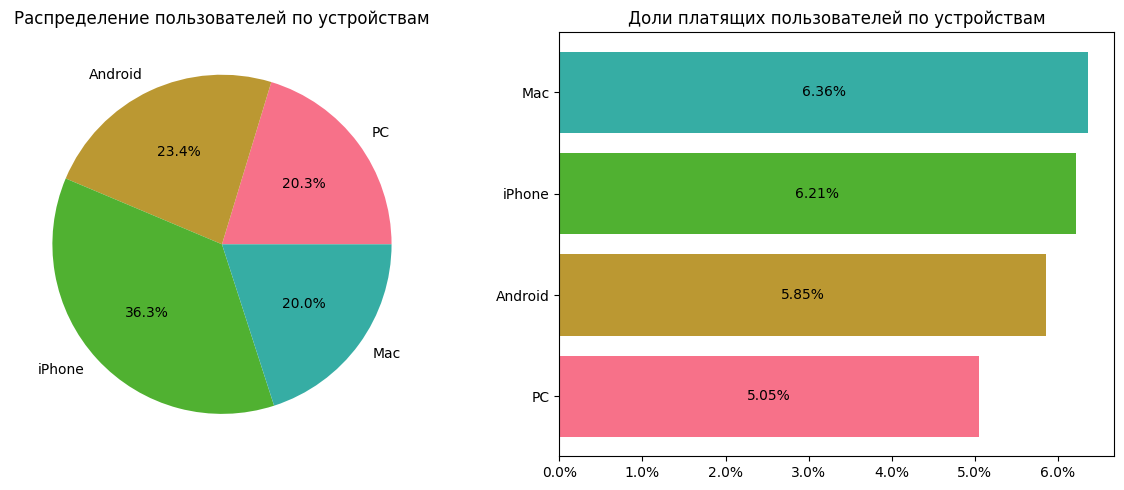

In [29]:
# сортировка для графика
profiles_agg = profiles_agg.sort_values(by='Доля платящих пользователей, %', ascending=True)

# создание матрицы диаграмм
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# вывод круговой диаграммы для`profiles_agg` 
axs[0].pie(
    profiles_agg['Количество пользователей'],
    autopct='%1.1f%%',
    labels=profiles_agg['Устройство'],
    colors=sns.color_palette("husl")
)
axs[0].set_title('Распределение пользователей по устройствам')

# вывод горизонтальной столбчатой диаграммы для `profiles_agg`
hbars = axs[1].barh(
    y=profiles_agg['Устройство'],
    width=profiles_agg['Доля платящих пользователей, %'],
    color=sns.color_palette("husl"),
)
axs[1].bar_label(hbars,label_type='center', fmt='{}%')
axs[1].set_title('Доли платящих пользователей по устройствам')
axs[1].xaxis.set_major_formatter(mticker.PercentFormatter())
plt.tight_layout()
plt.show()

<div style="border:solid gray 1px; padding: 20px">

**Выводы:** 
1. Пользователи приложения чаще используют мобильные устройства, чем стационарные компьютеры
   
2. Платящие пользователи предпочитают устройства Apple:
- доля платящих с компьютеров Mac - **6,36%**
- доля платящих с iPhone - **6,21%**

### Анализ источников пользователей

Изучим источники привлечения пользователей и определим каналы, из которых пришло больше всего платящих пользователей. Для этого построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [30]:
# количество пользователей и доля платящих по устройствам
profiles_agg = (
    profiles.groupby('channel')
    .agg(
        {
            'user_id': 'count',
            'payer': lambda x: round(x.mean() * 100,2)
        }
    )
    .reset_index()
    .sort_values(by='user_id', ascending=False)
    .rename(columns=
            {
                'channel': 'Источники пользователей',
                'user_id': 'Количество пользователей',
                'payer': 'Доля платящих пользователей, %'
            }
           )
)
profiles_agg

Источники пользователей  Количество пользователей  \
10                 organic                     56439   
1                 FaceBoom                     29144   
6                   TipTop                     19561   
4       OppleCreativeMedia                      8605   
2                  LeapBob                      8553   
7           WahooNetBanner                      8553   
5           RocketSuperAds                      4448   
3             MediaTornado                      4364   
8                  YRabbit                      4312   
0               AdNonSense                      3880   
9           lambdaMediaAds                      2149   

    Доля платящих пользователей, %  
10                            2.06  
1                            12.20  
6                             9.60  
4                             2.71  
2                             3.06  
7                             5.30  
5                             7.91  
3                             3.57  
8                             3.83  
0                            11.34  
9                            10.47

Оценим распределение пользователей по источникам на графике

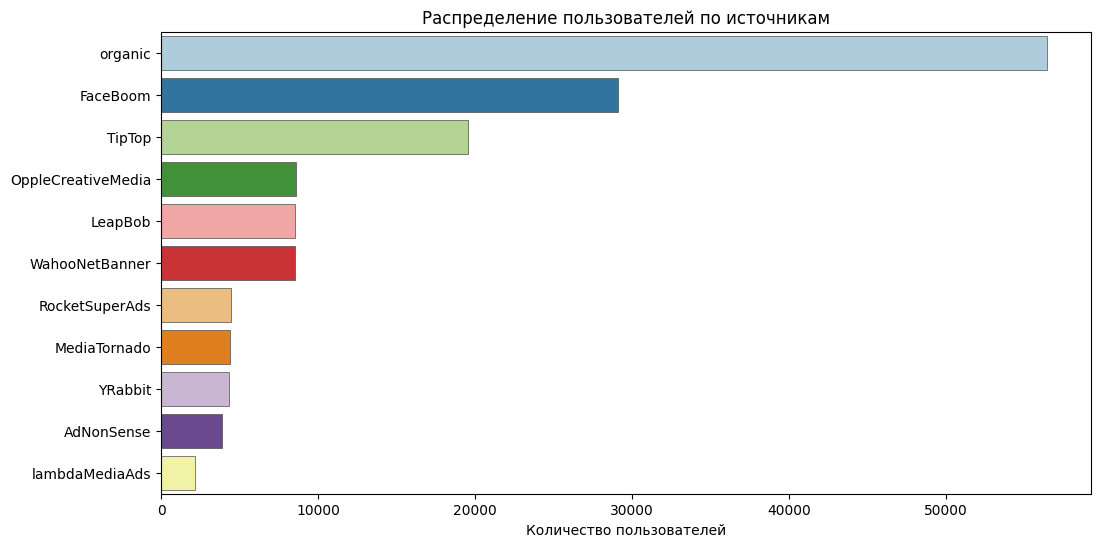

In [31]:
# задание размера графика
plt.figure(figsize=(12, 6))
palette = sns.color_palette("Paired", n_colors=profiles_agg['Источники пользователей'].nunique())
# вывод графиков по источникам
sns.barplot(
    data=profiles_agg,
    x="Количество пользователей",
    y="Источники пользователей",
    edgecolor=".3",
    hue="Источники пользователей",
    linewidth=.5,
    palette=palette
)
plt.title('Распределение пользователей по источникам')
plt.ylabel('')
plt.xlabel('Количество пользователей')
plt.show()

Оценим распределение рекламных источников по странам

In [32]:
# количество пользователей по устройствам и странам
profiles_agg = (
    profiles.groupby(['channel', 'region'])
    .agg(
        {
            'user_id': 'count',
            'payer': lambda x: round(x.mean() * 100,2)

        }
    )
    .reset_index()
    .rename(columns=
            {
                'channel': 'Источники пользователей',
                'region': 'Страна',
                'user_id': 'Количество пользователей',
                'payer': 'Доля платящих пользователей, %'
            }
           )
)
profiles_agg

Источники пользователей         Страна  Количество пользователей  \
0               AdNonSense         France                      1366   
1               AdNonSense        Germany                      1219   
2               AdNonSense             UK                      1295   
3                 FaceBoom  United States                     29144   
4                  LeapBob         France                      2988   
5                  LeapBob        Germany                      2519   
6                  LeapBob             UK                      3046   
7             MediaTornado  United States                      4364   
8       OppleCreativeMedia         France                      2991   
9       OppleCreativeMedia        Germany                      2562   
10      OppleCreativeMedia             UK                      3052   
11          RocketSuperAds  United States                      4448   
12                  TipTop  United States                     19561   
13          WahooNetBanner         France                      2971   
14          WahooNetBanner        Germany                      2579   
15          WahooNetBanner             UK                      3003   
16                 YRabbit  United States                      4312   
17          lambdaMediaAds         France                       742   
18          lambdaMediaAds        Germany                       649   
19          lambdaMediaAds             UK                       758   
20                 organic         France                      6392   
21                 organic        Germany                      5453   
22                 organic             UK                      6421   
23                 organic  United States                     38173   

    Доля платящих пользователей, %  
0                            10.98  
1                            11.65  
2                            11.43  
3                            12.20  
4                             3.01  
5                             2.74  
6                             3.38  
7                             3.57  
8                             2.67  
9                             2.50  
10                            2.92  
11                            7.91  
12                            9.60  
13                            5.12  
14                            5.74  
15                            5.09  
16                            3.83  
17                           11.05  
18                           10.32  
19                           10.03  
20                            1.71  
21                            2.31  
22                            2.04  
23                            2.08

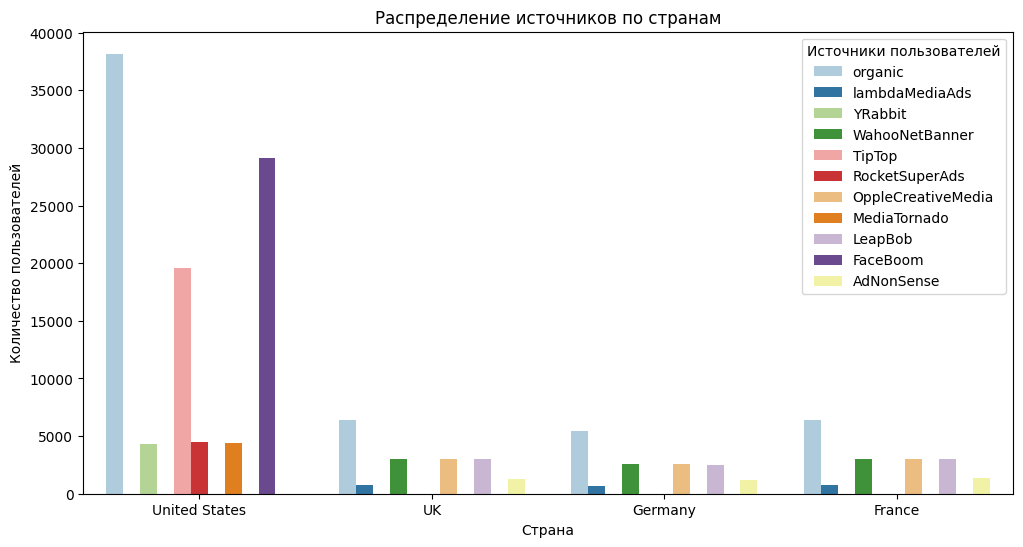

In [33]:
# задание размера графика
plt.figure(figsize=(12, 6))

# вывод графиков по странам и источникам
sns.barplot(
    x='Страна', 
    y='Количество пользователей', 
    hue='Источники пользователей', 
    data=profiles_agg.sort_values(by=['Источники пользователей', 'Страна', 'Количество пользователей'], ascending=False), 
    palette=palette
)
plt.title('Распределение источников по странам')
plt.xlabel('Страна')
plt.ylabel('Количество пользователей')
plt.legend(title='Источники пользователей')
plt.show()

<div style="border:solid gray 1px; padding: 20px">

**Выводы:** 
1. Учитывая большое количество пользователей и самую низкую конверсию пользователей в плательщиков **2,06%** из условно бесплатного источника "organic" вероятно имеет смысл подумать над возможностью увеличения конверсии с этого источника
   
2. Из рекламных источников больше всего пользователей дают FaceBoom, TipTop с долей плательщиков **12,2%** и **9,6%** соответственно

3. Ещё с двух рекламных источников приходят качественные пользователи, которые хорошо конвертятся в плательщиков: AdNonSense - **11.34%** и lambdaMediaAds **10.47%**. Однако пользователей с этих источников меньше всего. Вероятно имеет смысл подробнее исследовать пользователей из этих источников.

4. Рекламные источники FaceBoom, TipTop приводят пользователей только из США. А AdNonSense, lambdaMediaAds только из Франции, Германии и Великобритании

<a id="marketing"></a>
## Маркетинг

<a id="factors"></a>
### Общая сумма расходов и распределение по рекламным источникам

Для анализа используем таблицу `df_costs`

In [34]:
# запись информации о датах сумме расходов в переменные
min_costs_date = df_costs['dt'].min()
max_costs_date =  df_costs['dt'].max()
sum_costs = df_costs["costs"].sum()

# вывод информации о расходах
display(
    Markdown(
        f'Общая сумма расходов на маркетинг в период с {min_costs_date}'
        f' по {max_analysis_date} составляет: **{round(sum_costs,2)}**'
    )   
)

Общая сумма расходов на маркетинг в период с 2019-05-01 по 2019-10-27 составляет: **105497.3**

Оценим распределение расходов по рекламным источникам - сгруппируем расходы по столбцу `channel`

In [35]:
# расходы по рекламным источникам
costs_agg = (
    df_costs.groupby('channel')['costs'].sum()
    .reset_index()
    .sort_values(by='costs', ascending=False)
)

# добавление столбца 'share'
costs_agg['share'] = round(costs_agg['costs'] / sum_costs * 100, 2)

# переименование столбцов
costs_agg = costs_agg.rename(columns=
                             {
                                 'channel': 'Рекламный источник',
                                 'costs': 'Расходы',
                                 'share': 'Доля от общей суммы расходов, %'
                             }
                            )
costs_agg

Рекламный источник   Расходы  Доля от общей суммы расходов, %
6              TipTop  54751.30                            51.90
1            FaceBoom  32445.60                            30.75
7      WahooNetBanner   5151.00                             4.88
0          AdNonSense   3911.25                             3.71
4  OppleCreativeMedia   2151.25                             2.04
5      RocketSuperAds   1833.00                             1.74
2             LeapBob   1797.60                             1.70
9      lambdaMediaAds   1557.60                             1.48
3        MediaTornado    954.48                             0.90
8             YRabbit    944.22                             0.90

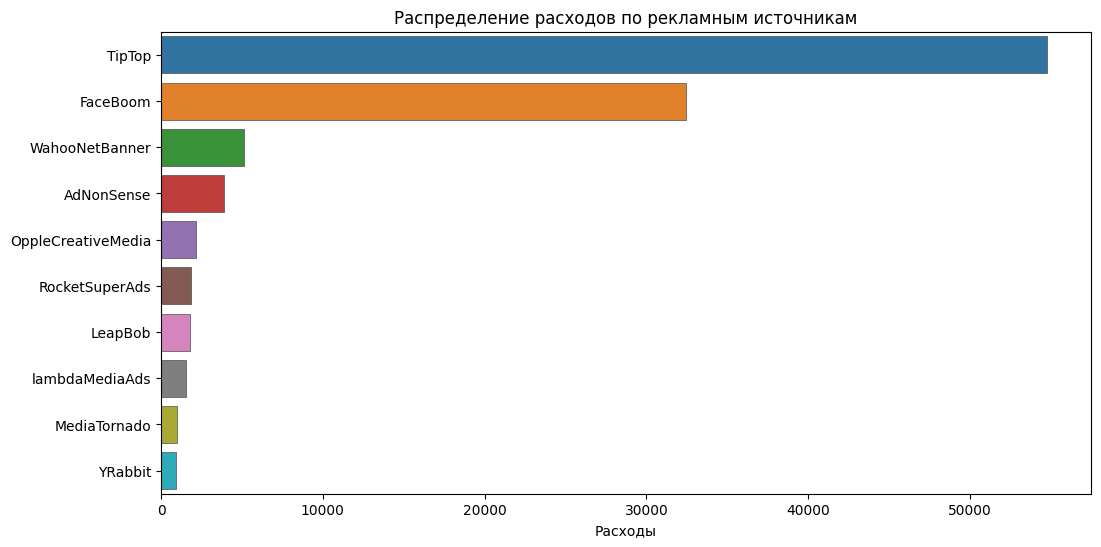

In [36]:
# задание размера графика
plt.figure(figsize=(12, 6))
palette = sns.color_palette(n_colors=costs_agg['Рекламный источник'].nunique())

# вывод графиков по источникам
sns.barplot(
    data=costs_agg,
    x="Расходы",
    y="Рекламный источник",
    edgecolor=".3",
    hue="Рекламный источник",
    linewidth=.5,
    palette=palette
)
plt.title('Распределение расходов по рекламным источникам')
plt.ylabel('')
plt.xlabel('Расходы')
plt.show()

<div style="border:solid gray 1px; padding: 20px">

**Выводы:**

1. Общая сумма расходов на маркетинг: **105497.3**
   
3. Более **82%** расходов приходится на два рекламных источника **TipTop** и **FaceBoom**

5. Расходы на TipTop почти на **70%** превышают расходы на FaceBoom при том, что количество пользователей из TipTop на 33% меньше чем из FaceBoom - и значит предположительно они дороже
   

<a id="costs_channel"></a>
### Расходы по рекламным источникам по периодам

Для **анализа расходов по неделям** в таблицу `df_costs` добавим столбец `week` и сгруппируем по нему расходы

In [37]:
# добавление столбца `week` в `df_costs`
df_costs['week'] = pd.to_datetime(df_costs['dt']).dt.isocalendar().week

# расходы по рекламным источникам и неделям
costs_agg = (
    df_costs
    .groupby(['week', 'channel'])
    .agg({'costs': 'sum'})
    .reset_index()
    .sort_values(by='costs', ascending=False)
)

Оценим динамику изменения расходов по неделям по каждому источнику на графике 

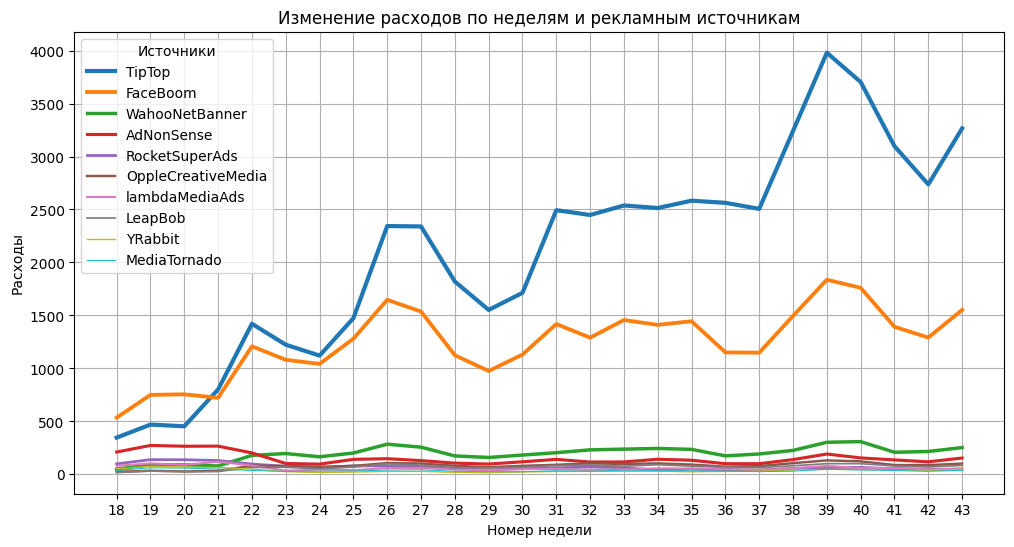

In [38]:
# вывод линейных графиков
plt.figure(figsize=(12, 6))
palette = sns.color_palette()
sns.lineplot(
    data=costs_agg,
    x="week",
    y="costs",
    hue="channel",
    size='channel',
    palette=palette
)
plt.title('Изменение раcходов по неделям и рекламным источникам')
plt.ylabel('Расходы')
plt.xlabel('Номер недели')
plt.legend(loc='upper left', title='Источники')
plt.grid()
plt.xticks(ticks=np.arange(18, 44, 1))
plt.show()

Для **анализа расходов по месяцам** в таблицу `df_costs` добавим столбец `month` и сгруппируем по нему расходы

In [39]:
# добавление столбца `week` в `df_costs`
df_costs['month'] = pd.to_datetime(df_costs['dt']).dt.month

# расходы по рекламным источникам и неделям
costs_agg = (
    df_costs
    .groupby(['month', 'channel'])
    .agg({'costs': 'sum'})
    .reset_index()
    .sort_values(by='costs', ascending=False)
)

Оценим динамику изменения расходов по месяцам по каждому источнику на графике.

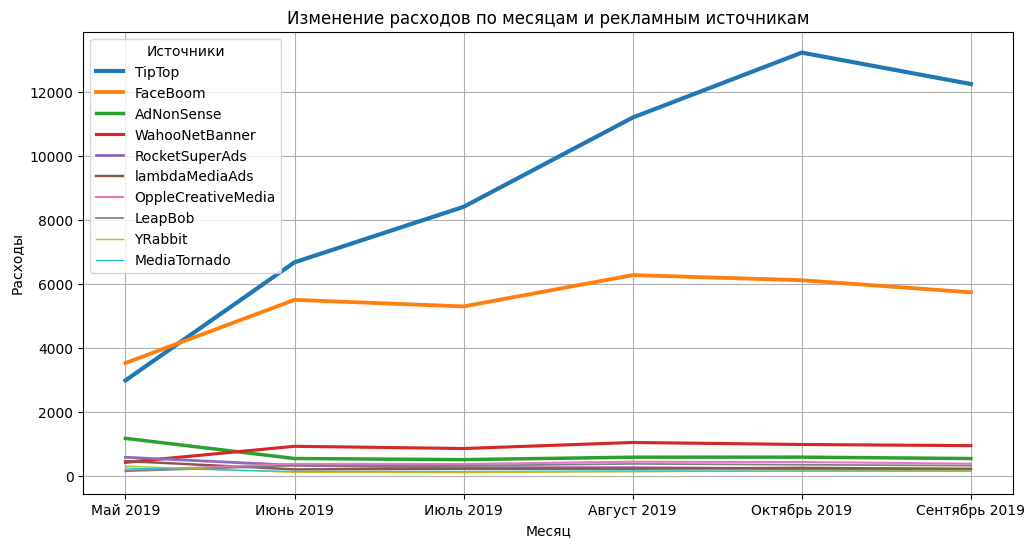

In [40]:
# вывод линейных графиков
plt.figure(figsize=(12, 6))
palette = sns.color_palette()
sns.lineplot(
    data=costs_agg,
    x="month",
    y="costs",
    hue="channel",
    size='channel',
    palette=palette
)
plt.title('Изменение раcходов по месяцам и рекламным источникам')
plt.ylabel('Расходы')
plt.xlabel('Месяц')
plt.legend(loc='upper left', title='Источники')
plt.grid()
unique_months = costs_agg['month'].unique()
month_names = ['Октябрь 2019', 'Сентябрь 2019', 'Август 2019', 'Июль 2019', 'Июнь 2019', 'Май 2019']
plt.xticks(unique_months, month_names)
plt.show()

<div style="border:solid gray 1px; padding: 20px">

**Вывод:**

1. Почти всё время (за исключением последних 4-х недель) расли расходы на предположительно дорогой и менее конверсионный в плательщиков источник **TipTop**
   
2. Расходы на более конверсионный **FaceBoom** практически не растут с июня 2019 г.

3. Расходы на остальные источники неизменно минимальные, хотя у **AdNonSense** и **lambdaMediaAds** конверсия сравнима с топовыми рекламными источниками

### Стоимость привлечения одного пользователя (CAC) из каждого источника

Рассчитаем средний CAC по каждому рекламному источнику. Для этого сгруппируем профили пользователей по `channel` и применим `mean()` к `acquisition_cost`. Исключим бесплатных органических пользователей.

In [41]:
# расчет среднего CAC по рекламным источникам
cac = (
    profiles.query('channel != "organic"')
    .groupby('channel')
    .agg(cac=('acquisition_cost', 'mean'))
    .sort_values(by='cac', ascending=False)
    .reset_index()
)
cac

channel       cac
0              TipTop  2.799003
1            FaceBoom  1.113286
2          AdNonSense  1.008054
3      lambdaMediaAds  0.724802
4      WahooNetBanner  0.602245
5      RocketSuperAds  0.412095
6  OppleCreativeMedia  0.250000
7             YRabbit  0.218975
8        MediaTornado  0.218717
9             LeapBob  0.210172

Оценим на графиках распределение расходов и САС по рекламным источникам

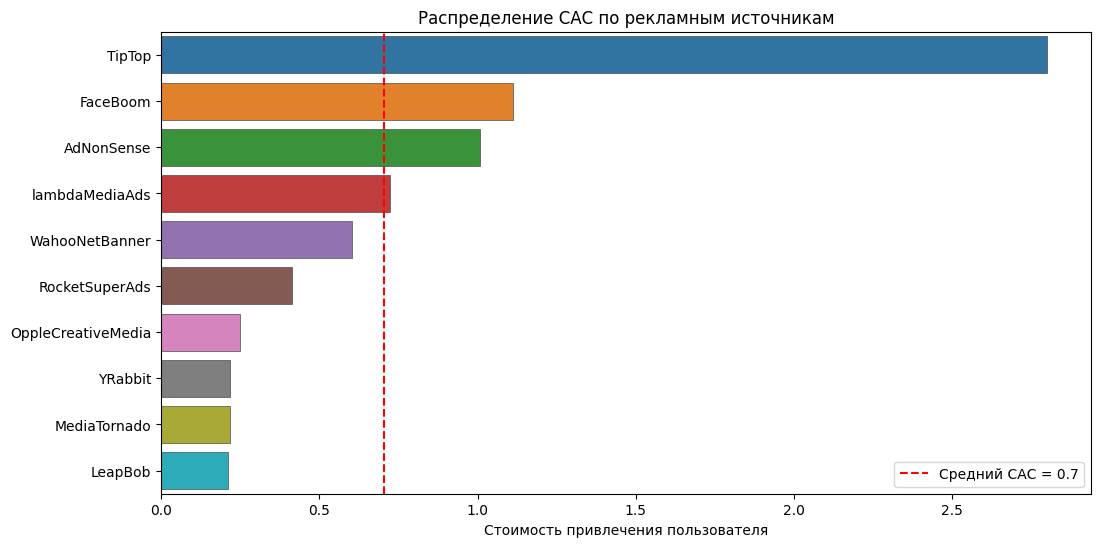

In [42]:
# задание размера графика
plt.figure(figsize=(12, 6))

# вывод графиков САС по источникам
sns.barplot(
    data=cac,
    x="cac",
    y="channel",
    edgecolor=".3",
    linewidth=.5,
    hue="channel",
    palette=palette
)

# добавление линии среднего САС
plt.axvline(
    x=profiles['acquisition_cost'].mean(), 
    color='r', 
    linestyle='--', 
    label=f'Средний САС = {round(profiles["acquisition_cost"].mean(),2)}')
    
plt.title('Распределение САС по рекламным источникам')
plt.ylabel('')
plt.xlabel('Стоимость привлечения пользователя')
plt.legend()
plt.show()

<div style="border:solid gray 1px; padding: 20px">

**Выводы:**

1. Самая высокая средняя стоимость привлечения одного пользователя **2,8** из **TipTop**
   
2. У второго по расходам источника **FaceBoom** САС меньше в 2,5 раза

3. У потенциально качественных каналов **AdNonSense** и **lambdaMediaAds** САС меньше в 2,8 и 3,9 раза соответственно

<a id="revenue_calc"></a>
## Оценка окупаемости рекламы

Установим момент и горизонт анализа данных. Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

In [43]:
# момент анализа
observation_date = datetime(2019, 11, 1).date()

# горизонт анализа
horizon_days = 14

### Оценка общей ситуации

Проанализируем окупаемость рекламы c помощью графиков LTV, ROI и графиков динамики LTV, CAC и ROI. Учитывая **37%** органических пользователей, оценим общую ситуацию с ними и без них.

#### Окупаемость рекламы с учетом органических пользователей

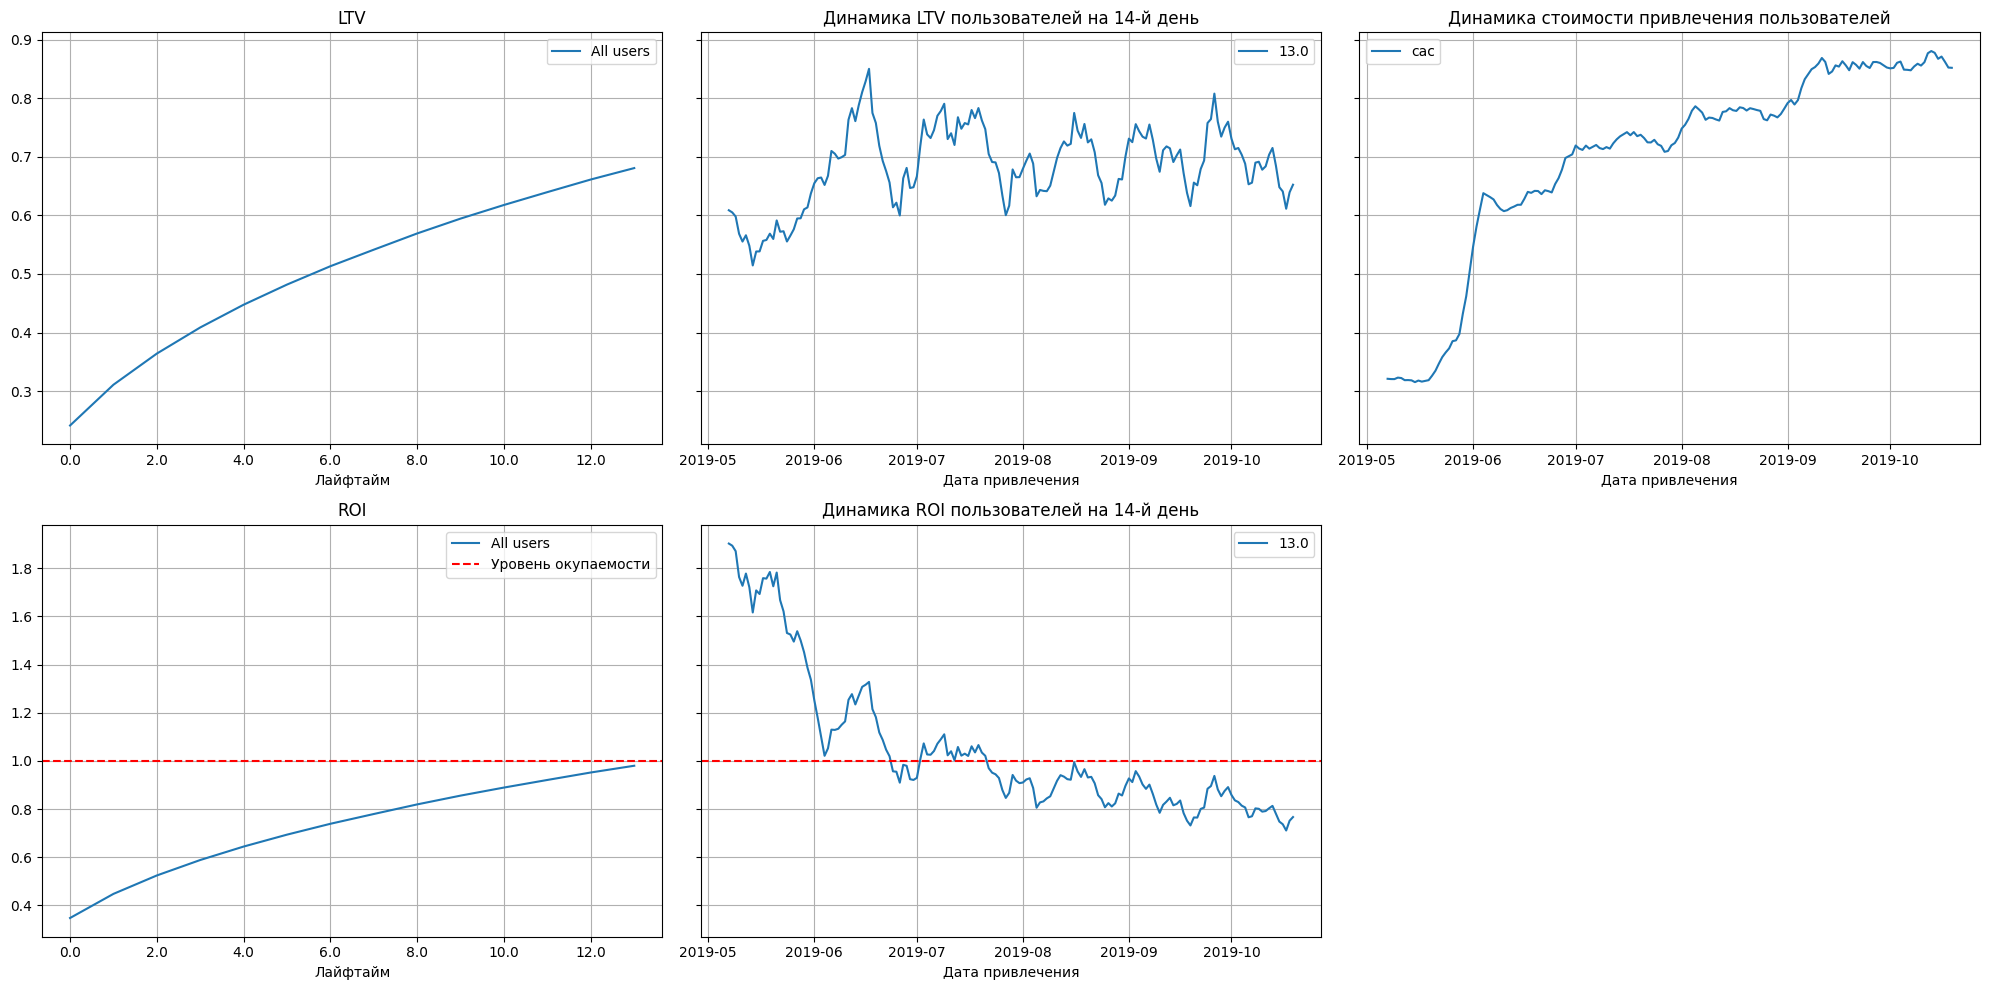

#### Окупаемость рекламы без учета органических пользователей

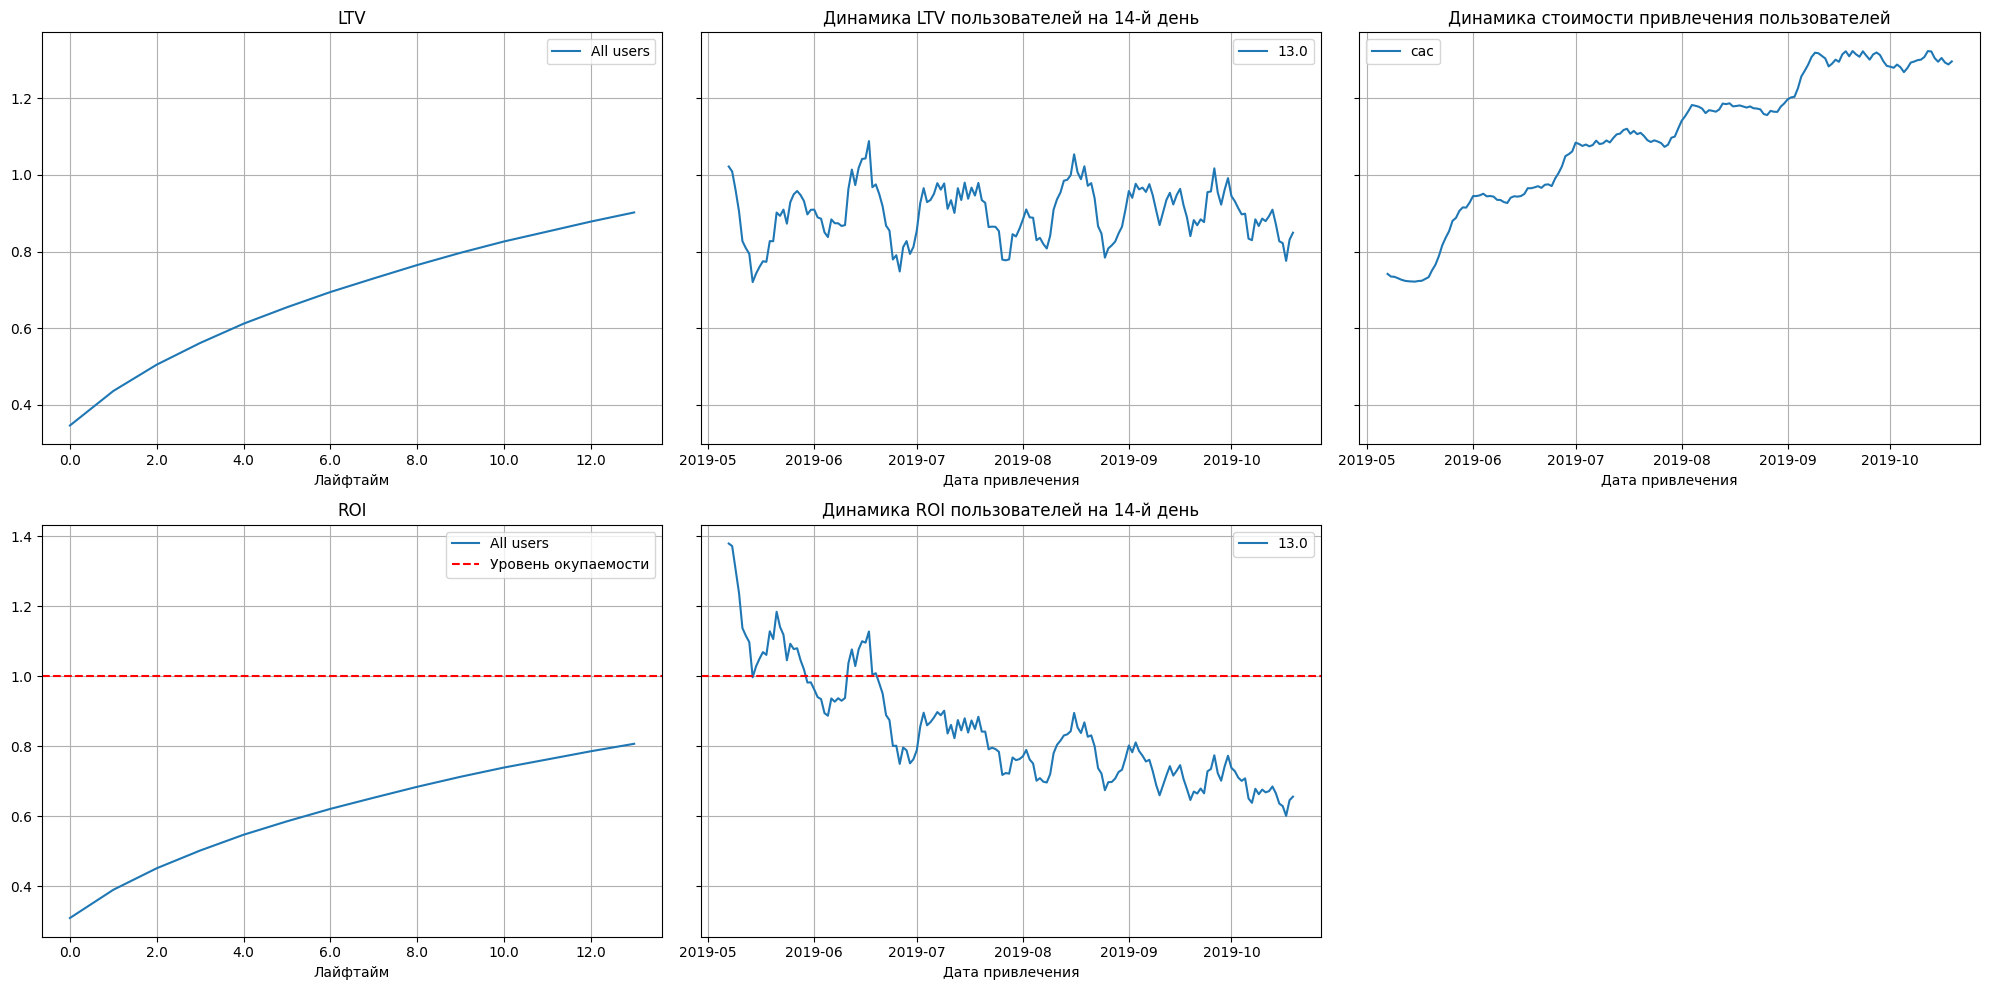

In [44]:
# расчет LTV и ROI по всем источникам
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, df_orders, observation_date, horizon_days
)
display(
    Markdown(
        f'#### Окупаемость рекламы с учетом органических пользователей'
    ) 
)
# построение графиков для всех источников
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

# расчет LTV и ROI только для рекламных источников
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), df_orders, observation_date, horizon_days
)
display(
    Markdown(
        f'#### Окупаемость рекламы без учета органических пользователей'
    ) 
)
# построение графиков только для рекламных источников
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

<div style="border:solid gray 1px; padding: 20px">

**Выводы:**

1. Реклама в целом не окупается:
- ROI без учета органических пользователей в конце второй недели около 80%
- органические пользователи "вытягивают" ROI к концу второй недели до 100% - но не дают возможность компании выйти в плюс
  
2. САС растет с середины мая 2019:
- рекламный бюджет растет, но нет соответствующего роста количества привлеченных пользователей
- вероятно в середине мая увеличили расходы на неэффективные рекламные источники(TipTop, FaceBoom - [п.4.2](#costs_channel))
- возможно с середины мая "сломалась" конверсия привлечения пользователей
  
3. На LTV и ROI стабильно влияет сезонный фактор - качество пользователей не ухудшается
   
4. За счет низкой конверсии в плательщиков органические пользователи снижают общую LTV

5. Исключим из дальнейшего анализа органических пользователей

<a id="conversion"></a>
### Анализ конверсии пользователей

Оценим **конверсию пользователей в плательщиков** и динамику изменения конверсии 14-го дня на графиках. Для сглаживания "шумности" графиков динамики конверсии установим окно скользящего среднего 28 дней.

In [45]:
# исключение органических пользователей из дальнейшего анализа
profiles = profiles.query('channel != "organic"')

#### Конверсия по устройствам

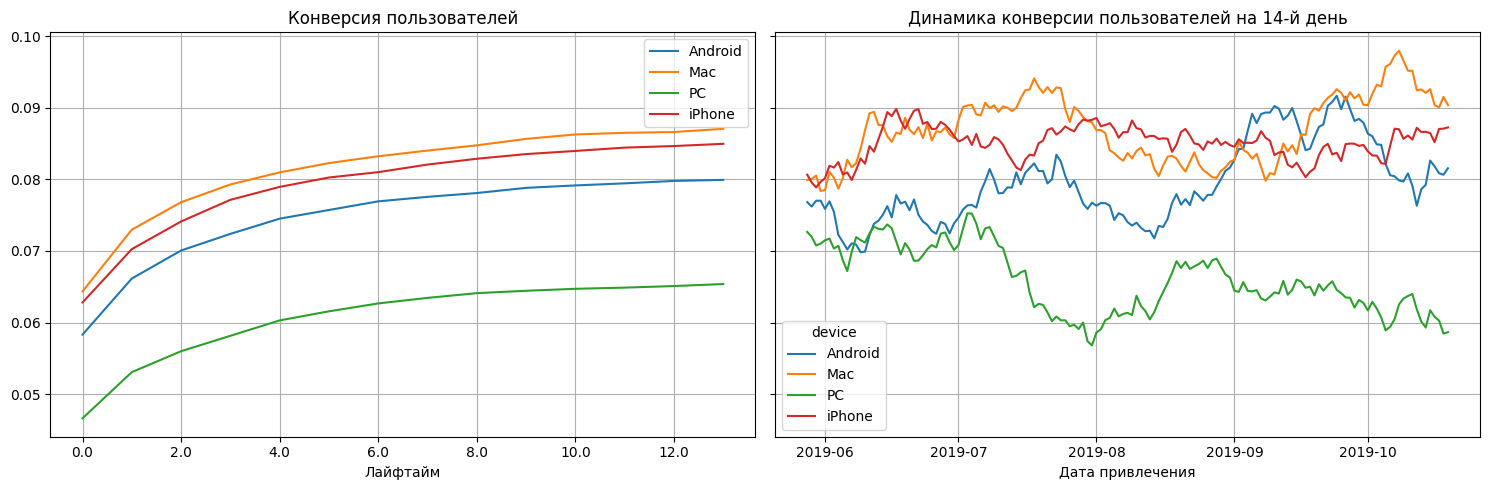

In [46]:
# расчет конверсии с разбивкой по устройствам
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, df_orders, observation_date, horizon_days, dimensions=dimensions
)
display(
    Markdown(
        f'#### Конверсия по устройствам'
    ) 
)

# построение графиков по устройствам
plot_conversion(conversion_grouped, conversion_history, horizon_days, window=28)

#### Конверсия по странам

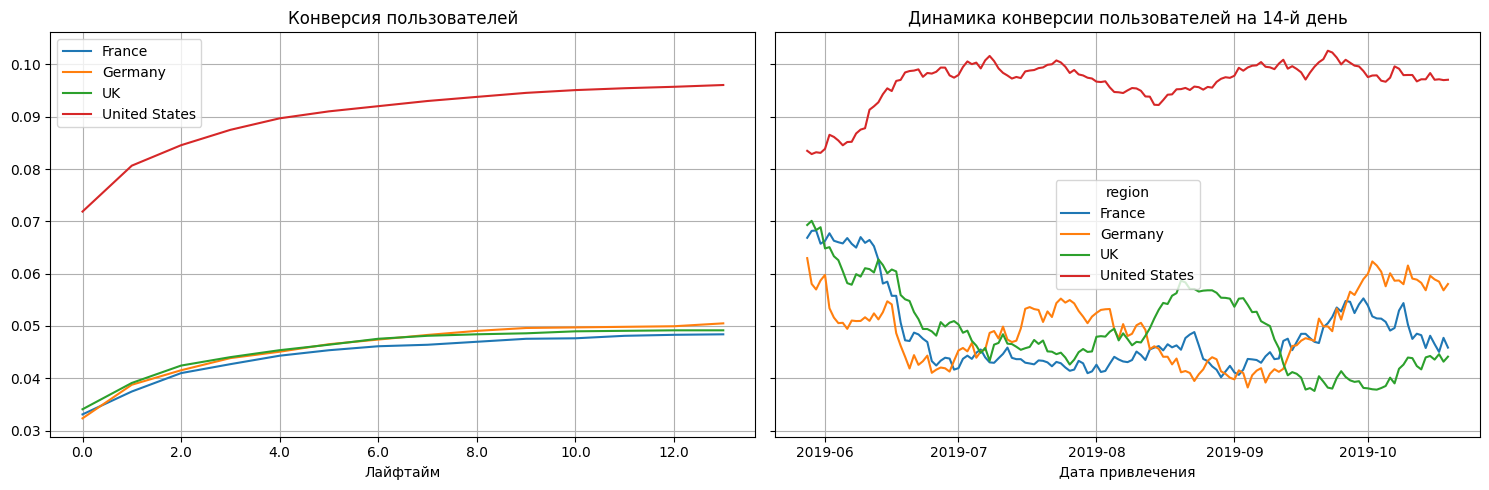

In [47]:
# расчет конверсии с разбивкой по странам
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, df_orders, observation_date, horizon_days, dimensions=dimensions
)
display(
    Markdown(
        f'#### Конверсия по странам'
    ) 
)

# построение графиков по странам
plot_conversion(conversion_grouped, conversion_history, horizon_days, window=28)

#### Конверсия по рекламным источникам

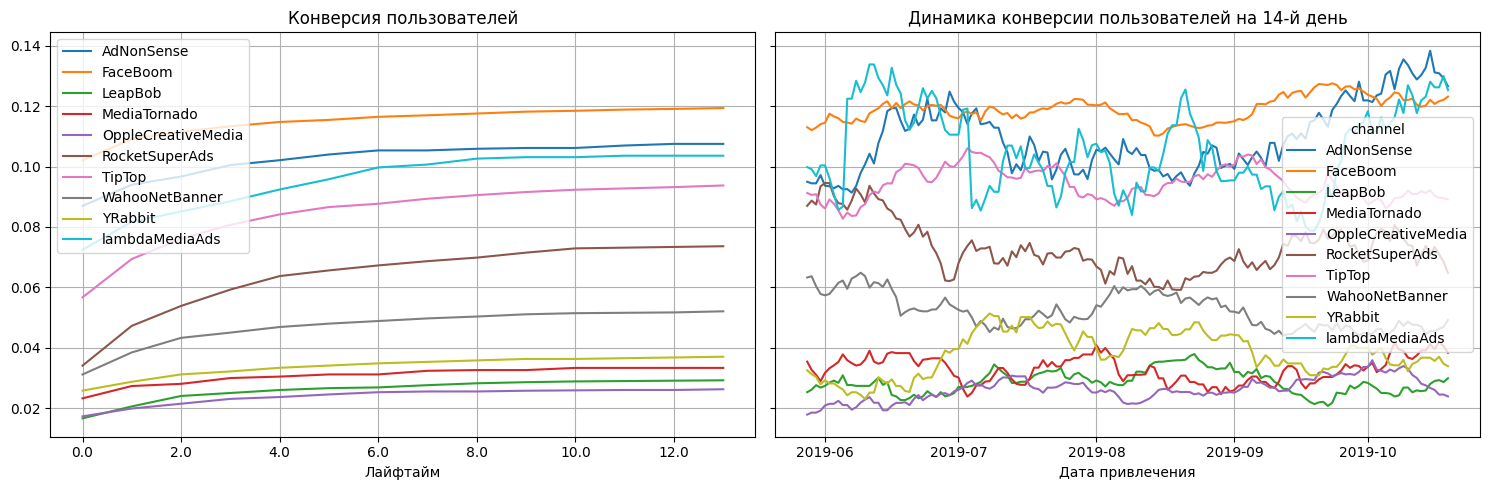

In [48]:
# расчет конверсии с разбивкой по источникам
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, df_orders, observation_date, horizon_days, dimensions=dimensions
)
display(
    Markdown(
        f'#### Конверсия по рекламным источникам'
    ) 
)

# построение графиков по источникам
plot_conversion(conversion_grouped, conversion_history, horizon_days, window=28)

<div style="border:solid gray 1px; padding: 20px">

**Выводы:**

1. Устройства:
- конверсия пользователей компьютеров РС ниже, чем у пользователей других устройств и снижается с начала июля
- конверсия пользователей компьютеров Мас выше, чем у пользователей других устройств
  
2. Конверсия пользователей из США почти в 2 раза выше, чем у пользователей из других стран. Причём "отрыв" произошёл в течение июня
   
3. Рекламные источники - лидеры по конверсии: **FaceBoom, TipTop, AdNonSense и lambdaMediaAds**. Причем конверсия двух последних резко выросла с середины сентября примерно на 4 процентных пункта

<a id="conversion"></a>
### Анализ удержания пользователей

Оценим **удержание пользователей** и динамику изменения удержания 14-го дня на графиках. Для сглаживания "шумности" графиков динамики удержания установим окна скользящего среднего от 7 до 28 дней.

#### Удержание по устройствам

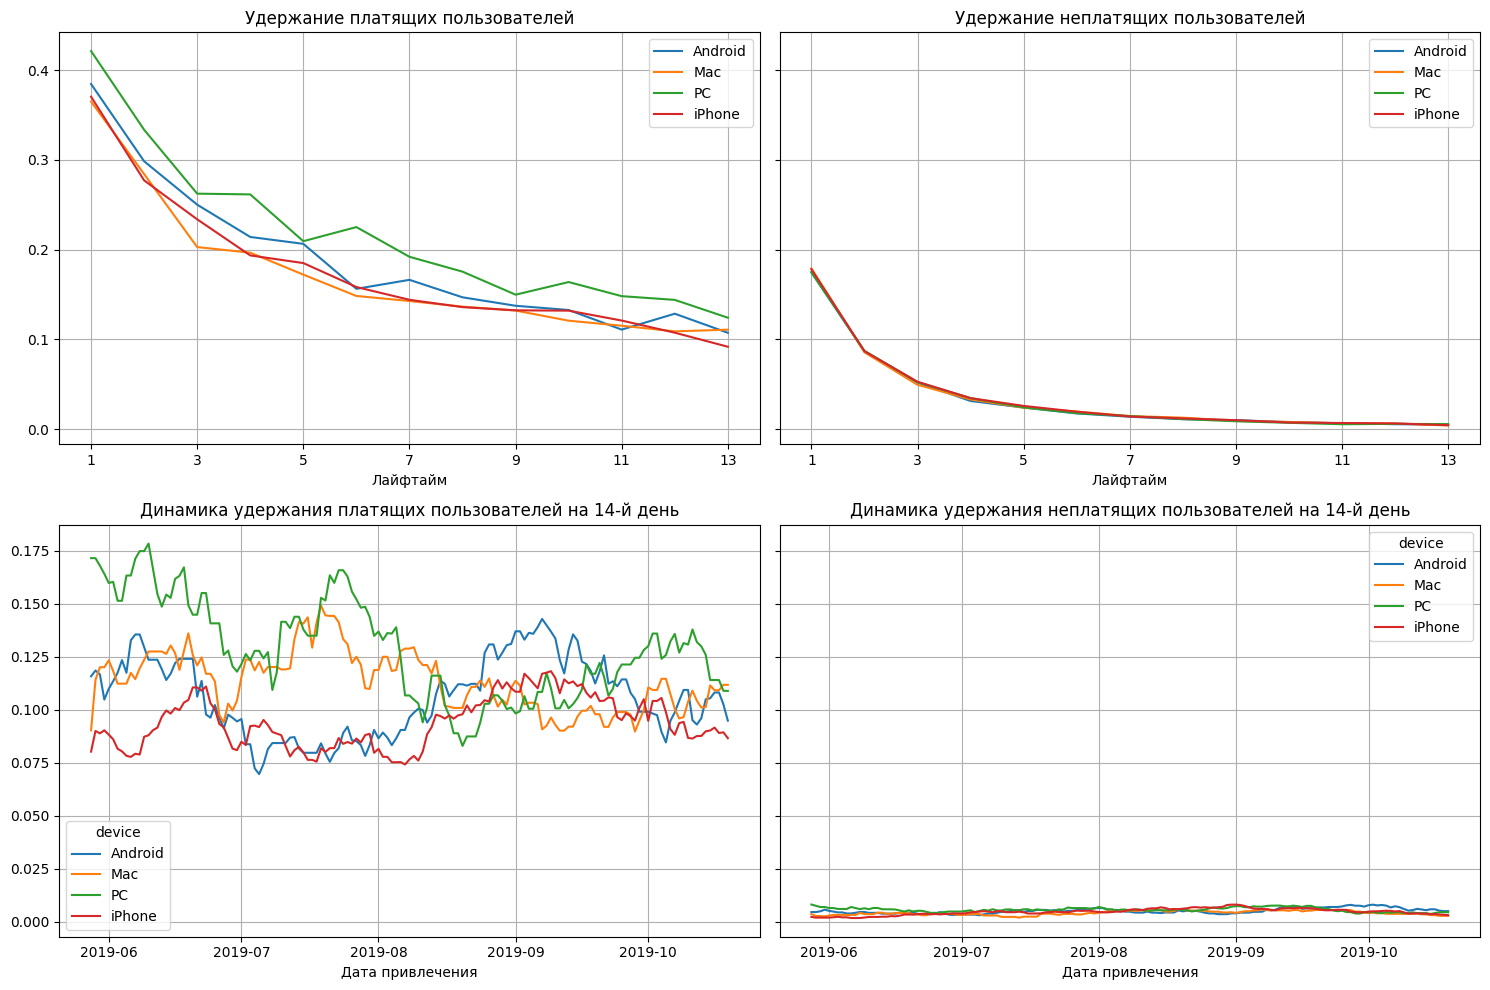

In [49]:
# расчет удержания с разбивкой по устройствам
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, df_visits, observation_date, horizon_days, dimensions=dimensions
)
display(
    Markdown(
        f'#### Удержание по устройствам'
    ) 
)

# построение графиков по устройствам
plot_retention(retention_grouped, retention_history, horizon_days, window=28) 

#### Удержание по странам

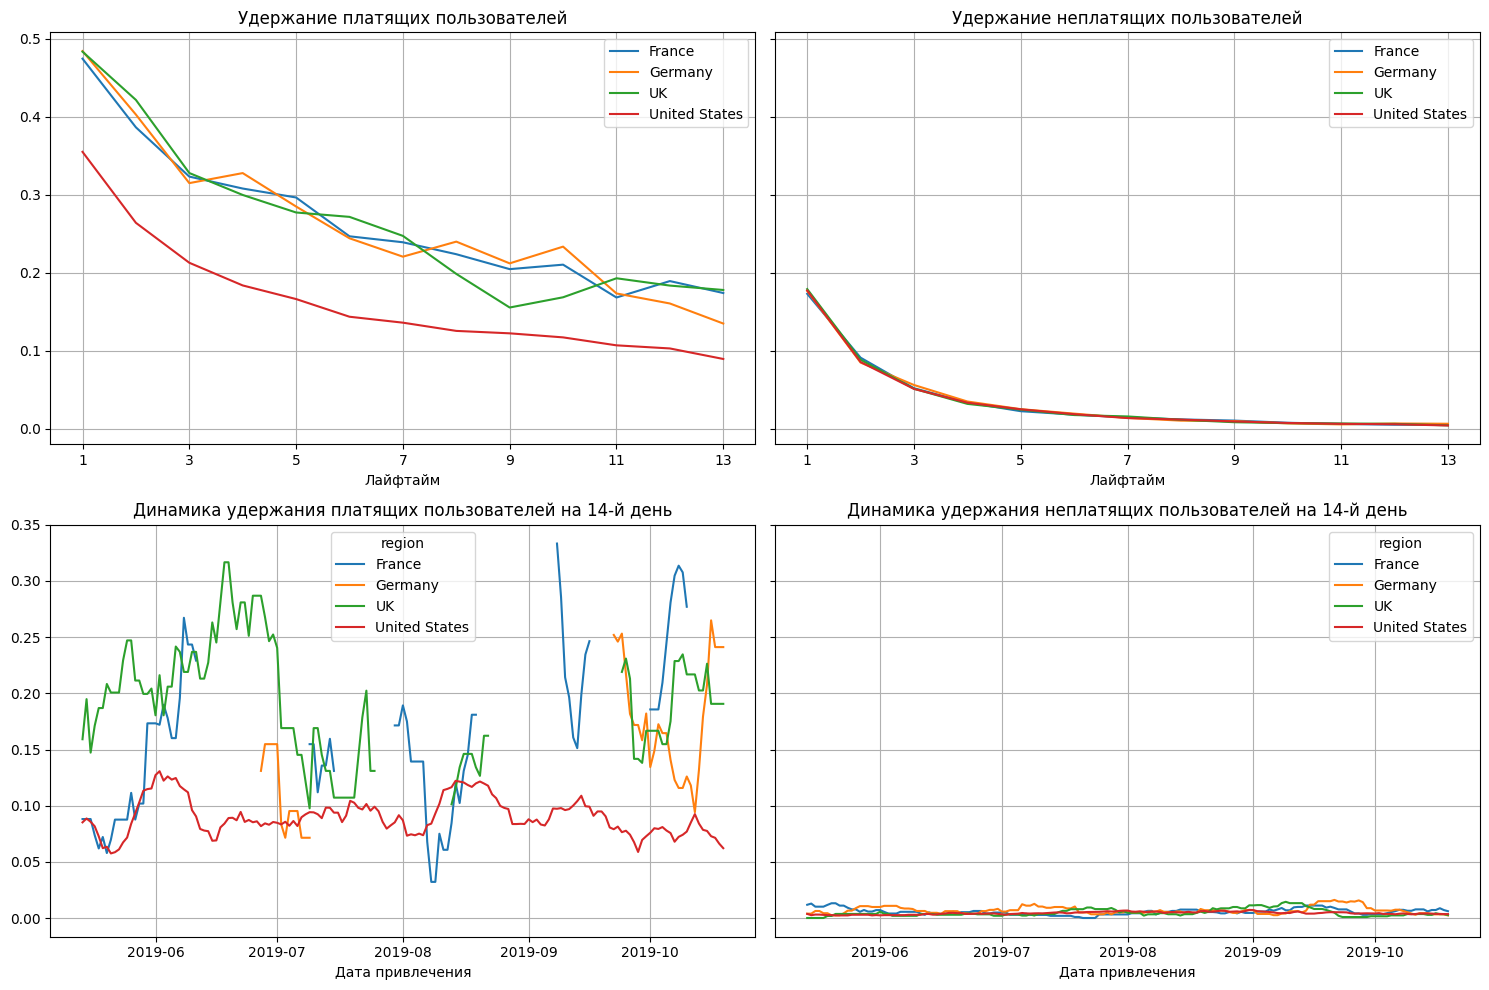

In [50]:
# расчет удержания с разбивкой по странам
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, df_visits, observation_date, horizon_days, dimensions=dimensions
)
display(
    Markdown(
        f'#### Удержание по странам'
    ) 
)

# построение графиков по странам
plot_retention(retention_grouped, retention_history, horizon_days, window=14) 

#### Удержание по рекламным источникам

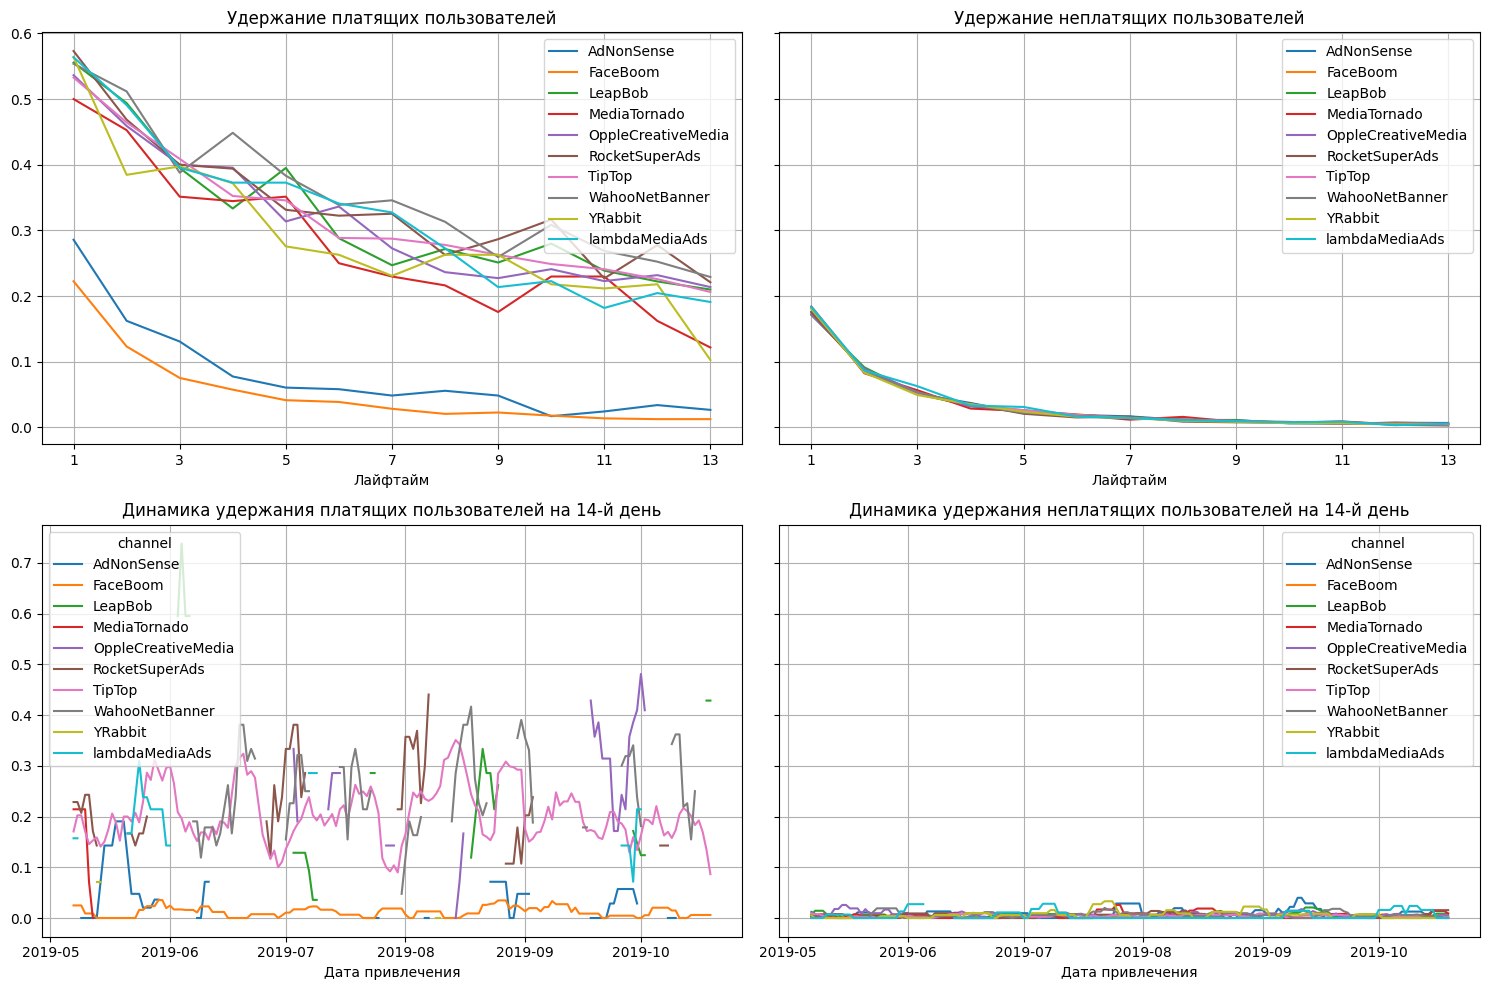

In [51]:
# расчет удержания с разбивкой по источникам
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, df_visits, observation_date, horizon_days, dimensions=dimensions
)
display(
    Markdown(
        f'#### Удержание по рекламным источникам'
    ) 
)

# построение графиков по источникам
plot_retention(retention_grouped, retention_history, horizon_days, window=7) 

<div style="border:solid gray 1px; padding: 20px">

**Выводы:**

1. Удержание пользователей компьютеров РС немного выше, чем пользователей других устройств
  
2. Пользователи из США стабильно хуже удерживаются, чем пользователи из других стран.
   
3. Пользователи из рекламных источников FaceBoom, AdNonSense стабильно плохо удерживаются. Для платящих пользователей с этих источников удержание 14-го дня ниже, чем с других источников примерно на 20%.

4. Рекламные источники FaceBoom (США) и AdNonSense (Франция, Германия, Великобритания):
- учитывая высокую конверсию в плательщиков ([п.5.2](#conversion)), вероятно пользователи с этих источников мотивированы к первой покупке. Но затем их ожидания не оправдываются, и они не возвращаются к использованию приложения и не делают повторных платежей
- для дальнейшей проверки этой гипотезы необходимо построить графики LTV и ROI по странам и рекламным источникам

### Окупаемость по устройствам

Построим графики LTV, ROI и графики динамики LTV, CAC и ROI с разбивкой по устройствам

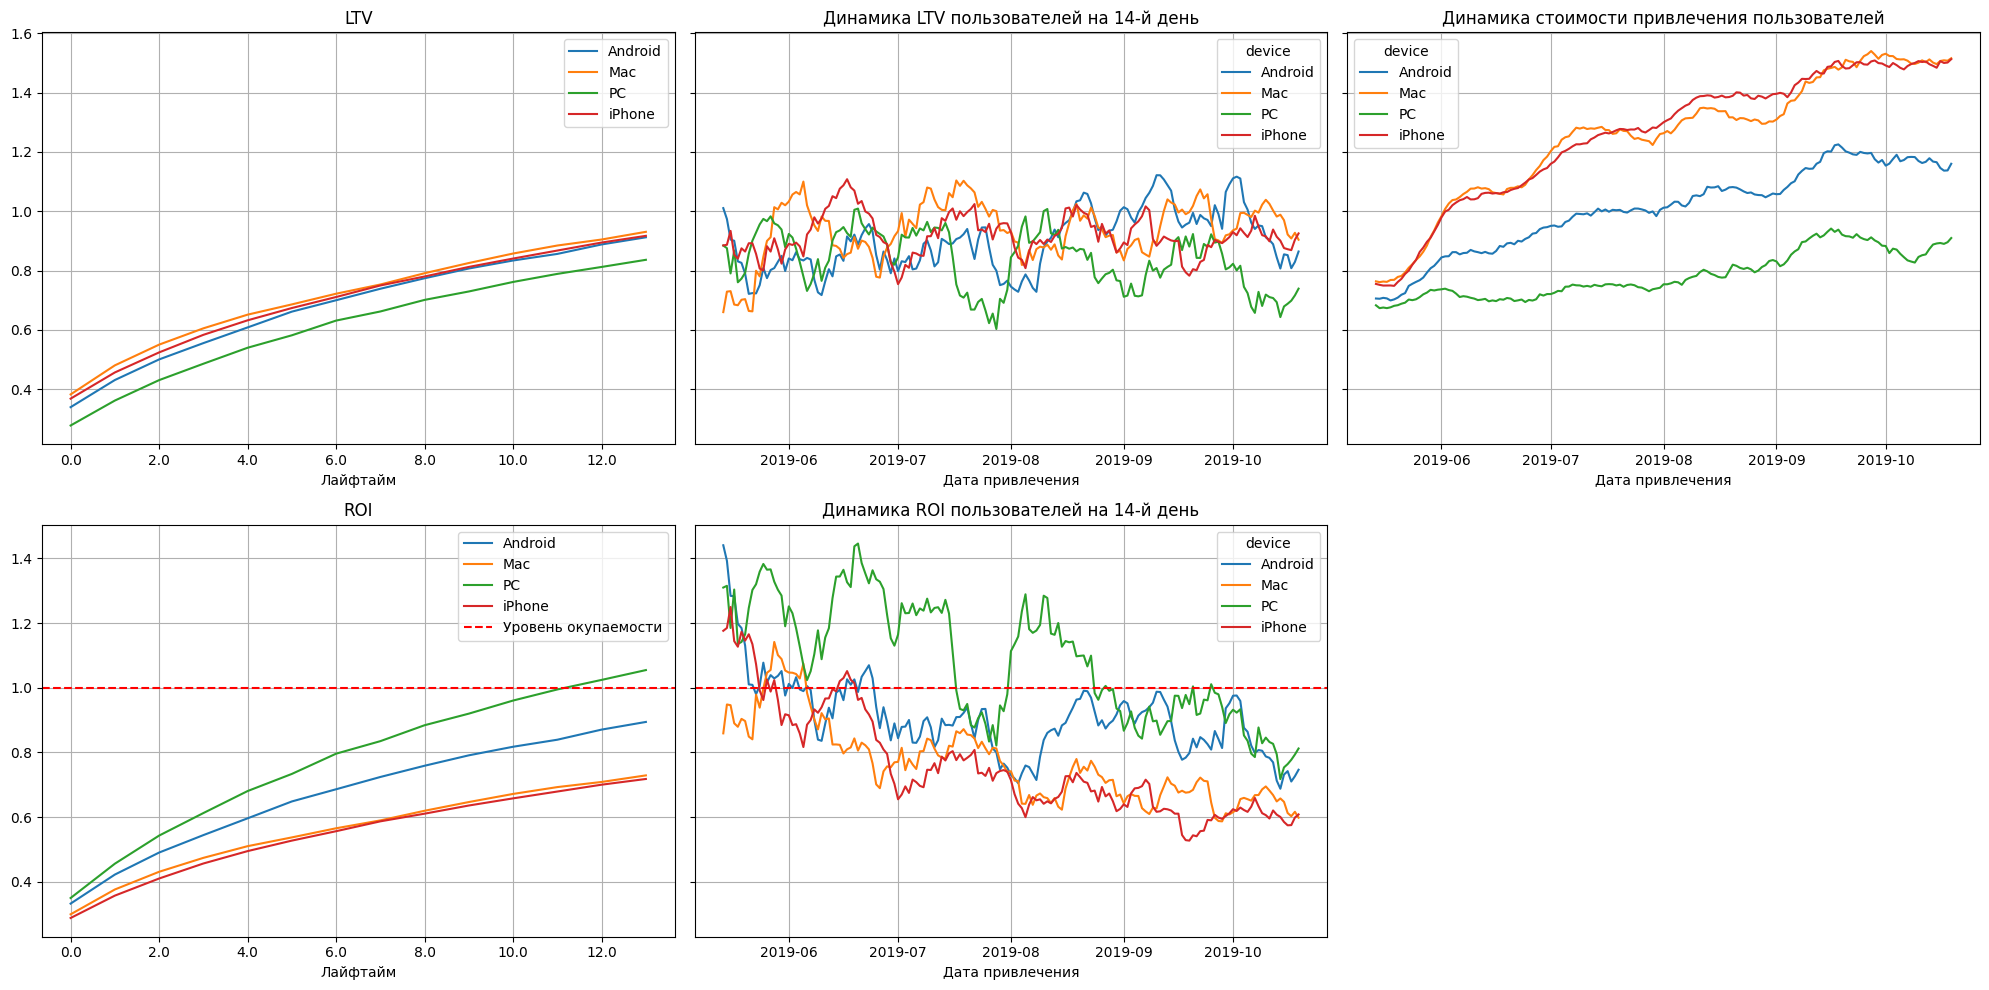

In [52]:
# расчет LTV и ROI с разбивкой по устройствам
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, df_orders, observation_date, horizon_days, dimensions=dimensions
)

# построение графиков с разбивкой по устройствам
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

<div style="border:solid gray 1px; padding: 20px">

**Вывод:** 

1. Стоимость привлечения пользователей всех устройств растет - увеличение бюджета не приводит к увеличению новых пользователей

2. Стоимость привлечения пользователей компьютеров PC ниже, чем у пользователей других устройств.

3. Пользователи РС выходят на окупаемость лишь с 11-го дня
   
4. Однако из-за низкого LTV пользователей РС 14-го дня и роста САС начиная с сентября 2019 - пользователи РС перестали окупаться

<a id="revenue_region"></a>
### Окупаемость по странам

Построим графики LTV, ROI и графики динамики LTV, CAC и ROI с разбивкой по странам

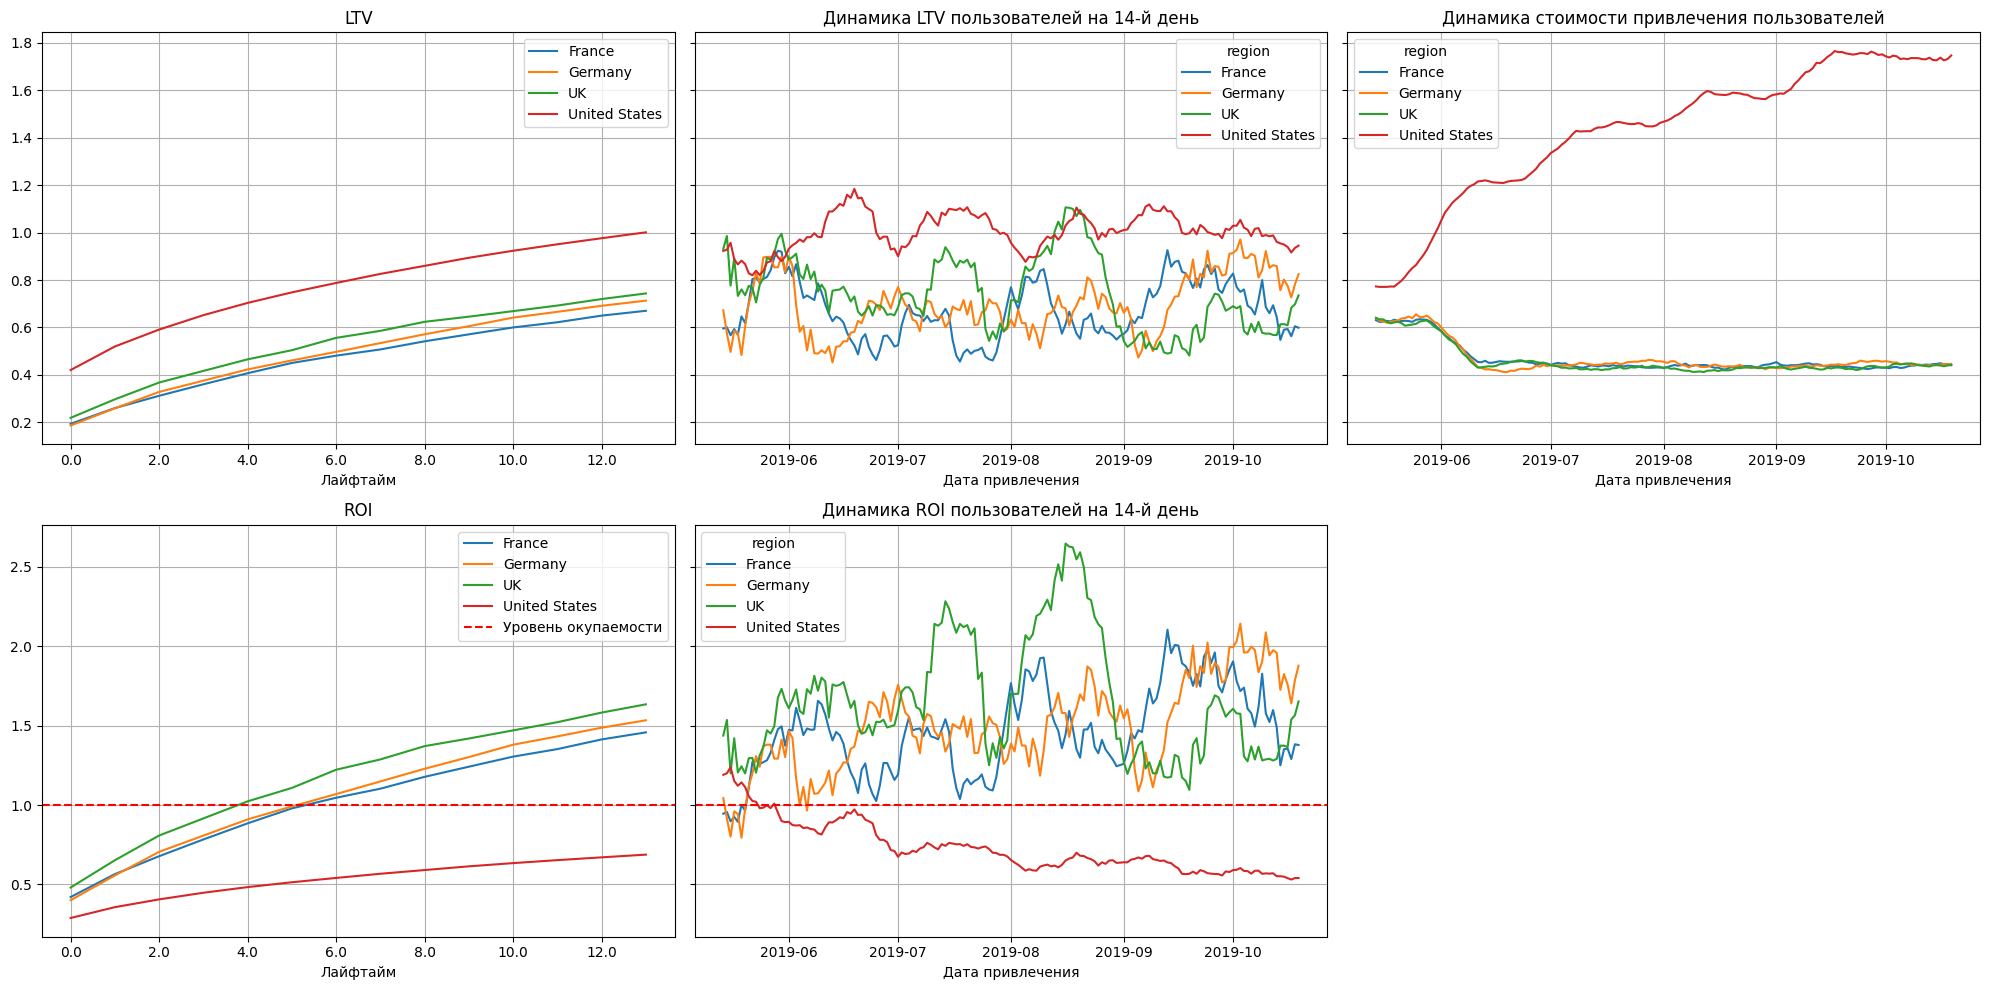

In [53]:
# расчет LTV и ROI с разбивкой по странам
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, df_orders, observation_date, horizon_days, dimensions=dimensions
)

# построение графиков с разбивкой по странам
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

<div style="border:solid gray 1px; padding: 20px">

**Вывод:** 

1. Стоимость привлечения пользователей из США растет с июня, в то время как из других стран снизилась и практически неизменна
   
2. Пользователи из Франции, Германии и Великобритании окупаются начиная с шестого дня даже с учетом сезонности

3. Пользователи из США не окупаются. Отрицательная динамика ROI пользователей на 14-й день обратно пропорциональна росту САС

4. LTV пользователей из США выше, чем у других стран. Но высокая САС не дает им окупаться

5. Рекомендации по странам:
- увеличить закупку пользователей из Франции, Германии и Великобритании с учетом эффективности рекламных источников
- выяснить рекламный источник, с которого приходят посетители из США и не становятся пользователями

<a id="revenue_channel"></a>
### Окупаемость по рекламным источникам


Построим графики LTV, ROI и графики динамики LTV, CAC и ROI с разбивкой по рекламным источникам пользователей

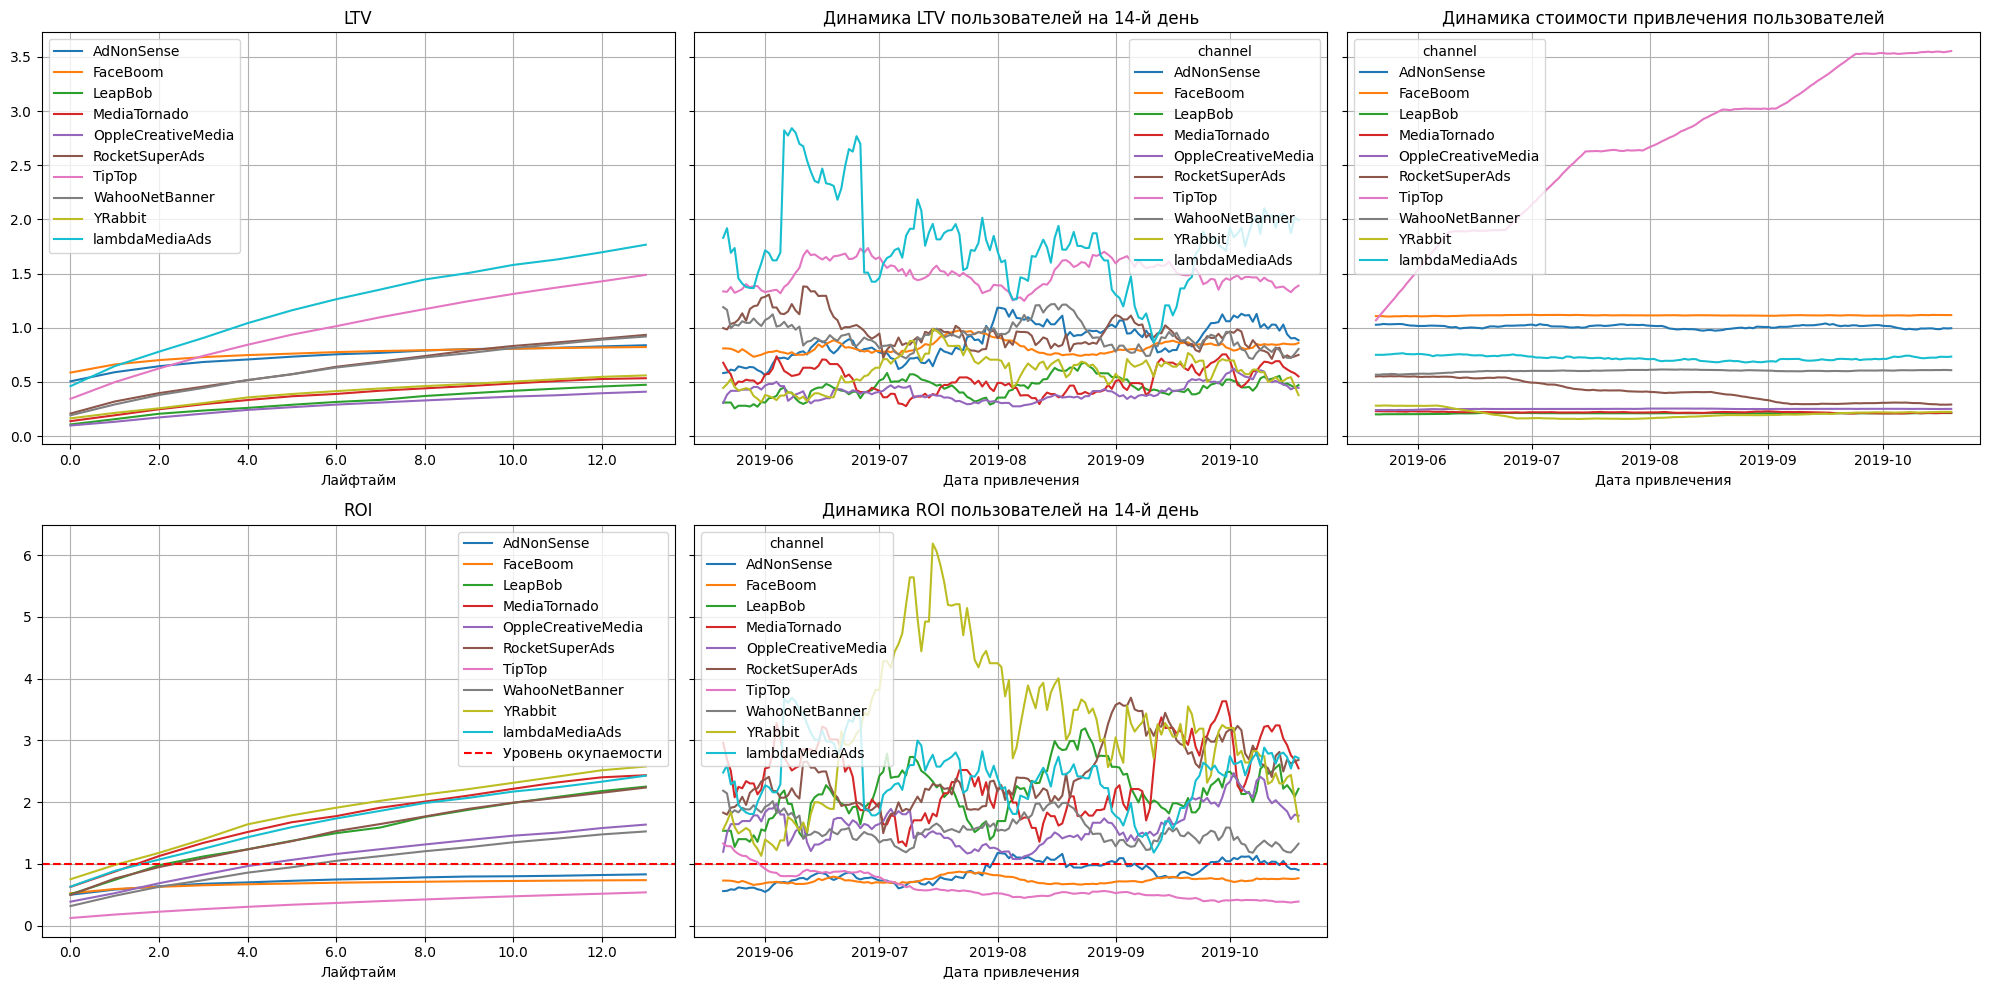

In [54]:
# расчет LTV и ROI с разбивкой по источникам
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, df_orders, observation_date, horizon_days, dimensions=dimensions
)

# построение графиков с разбивкой по источникам
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=21)

Оценим окупаемость рекламных источников, приводящих пользователей из разных стран.

**Окупаемость AdNonSense в разных странах**

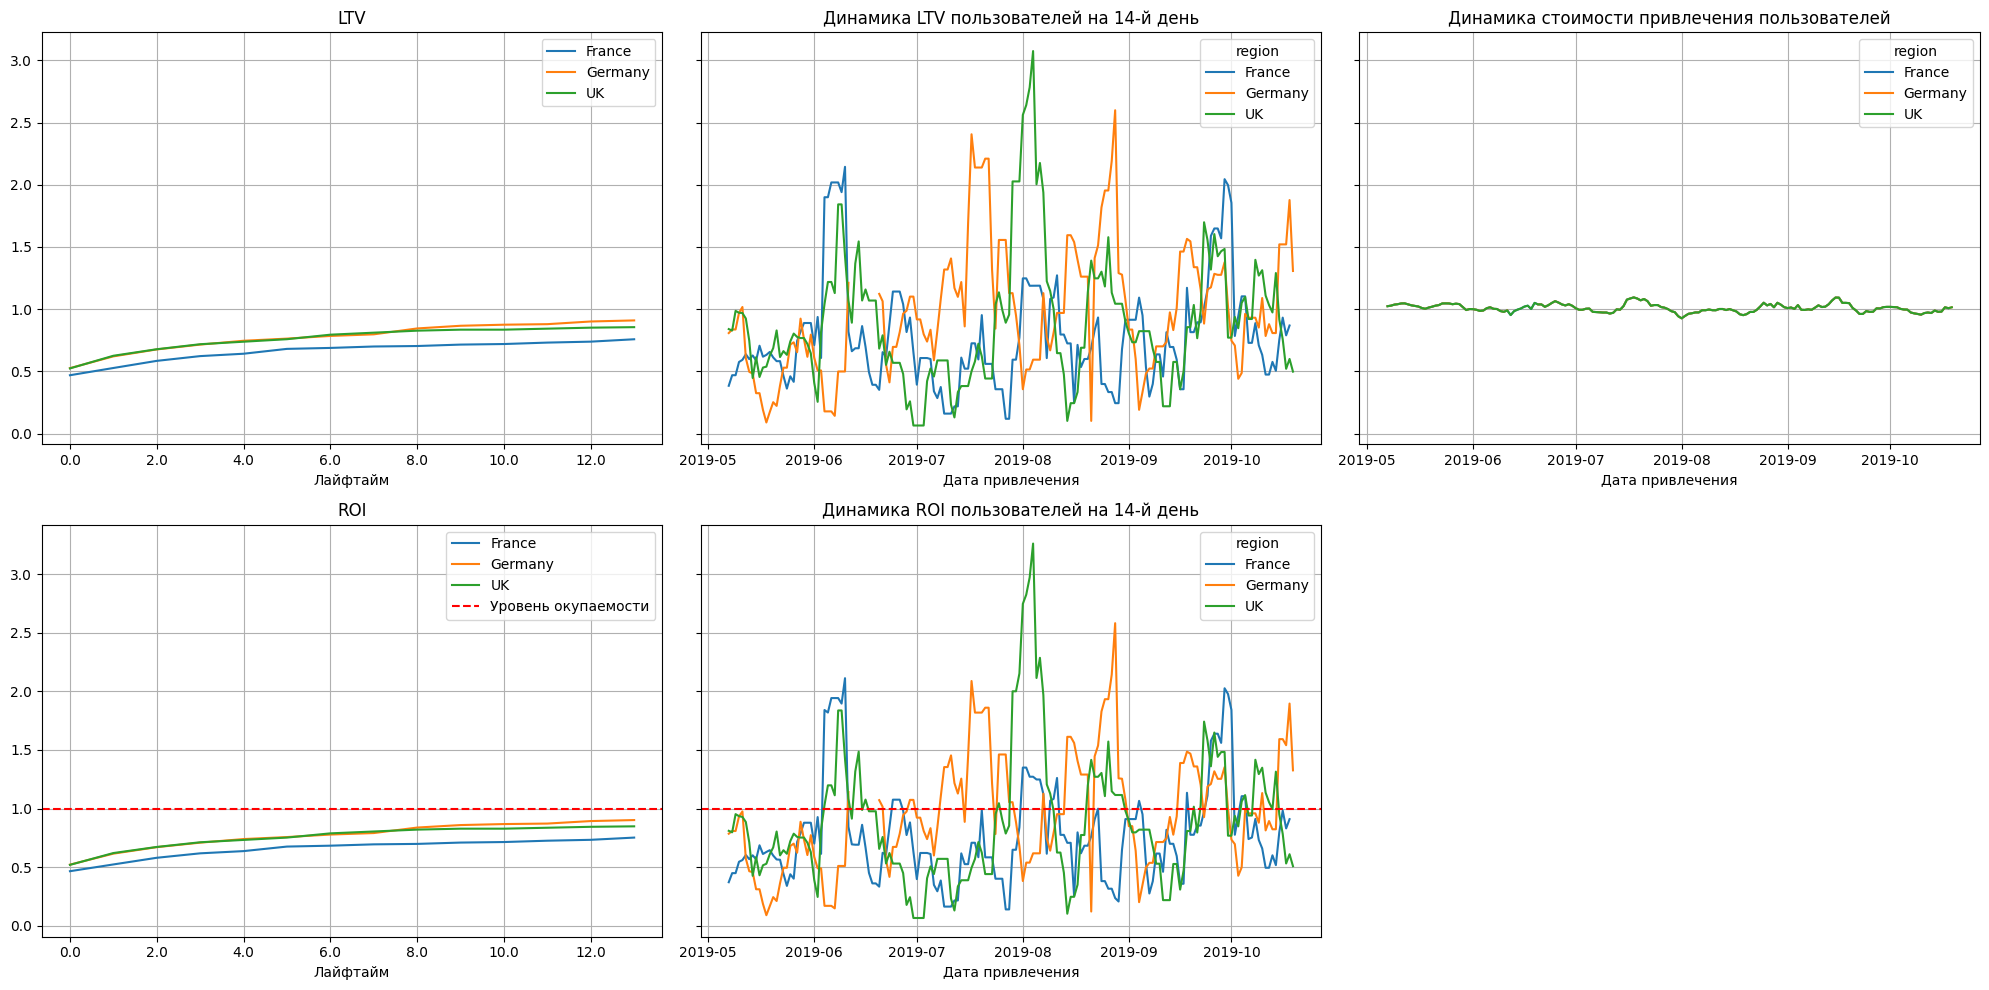

**Окупаемость LeapBob в разных странах**

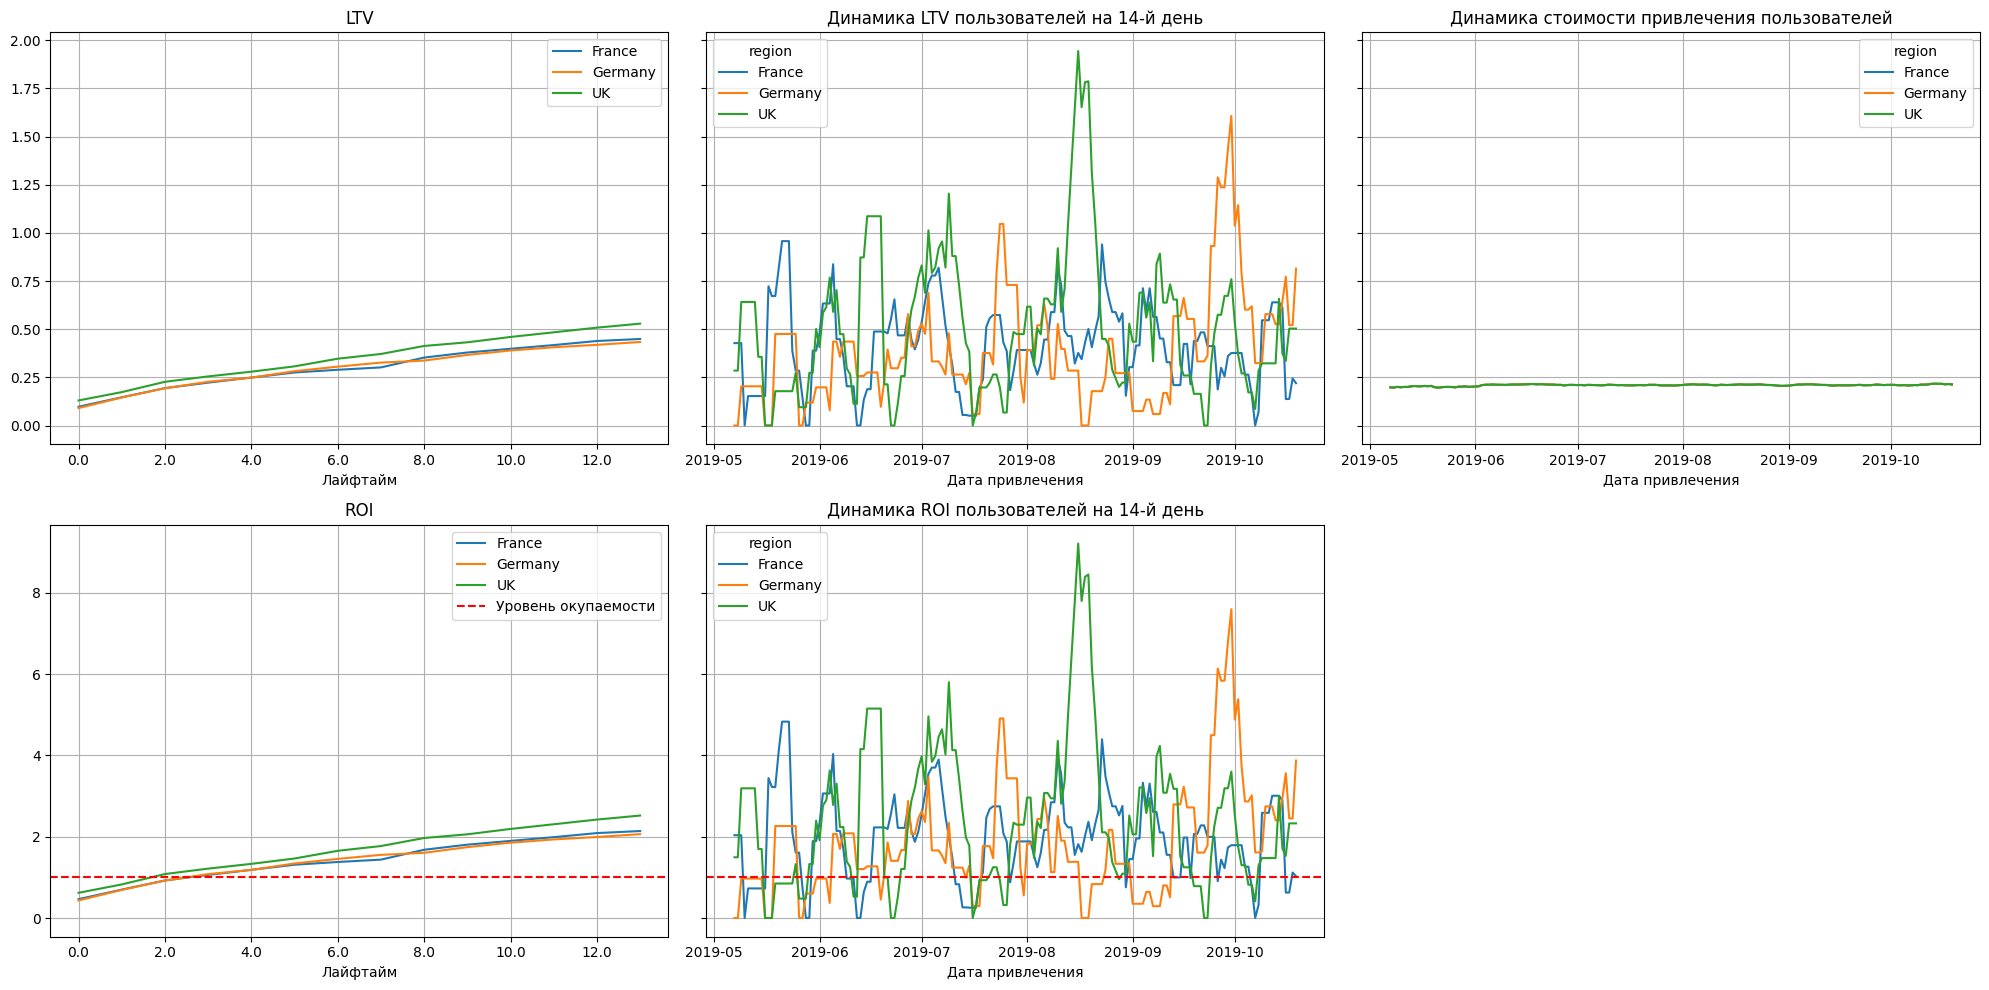

**Окупаемость WahooNetBanner в разных странах**

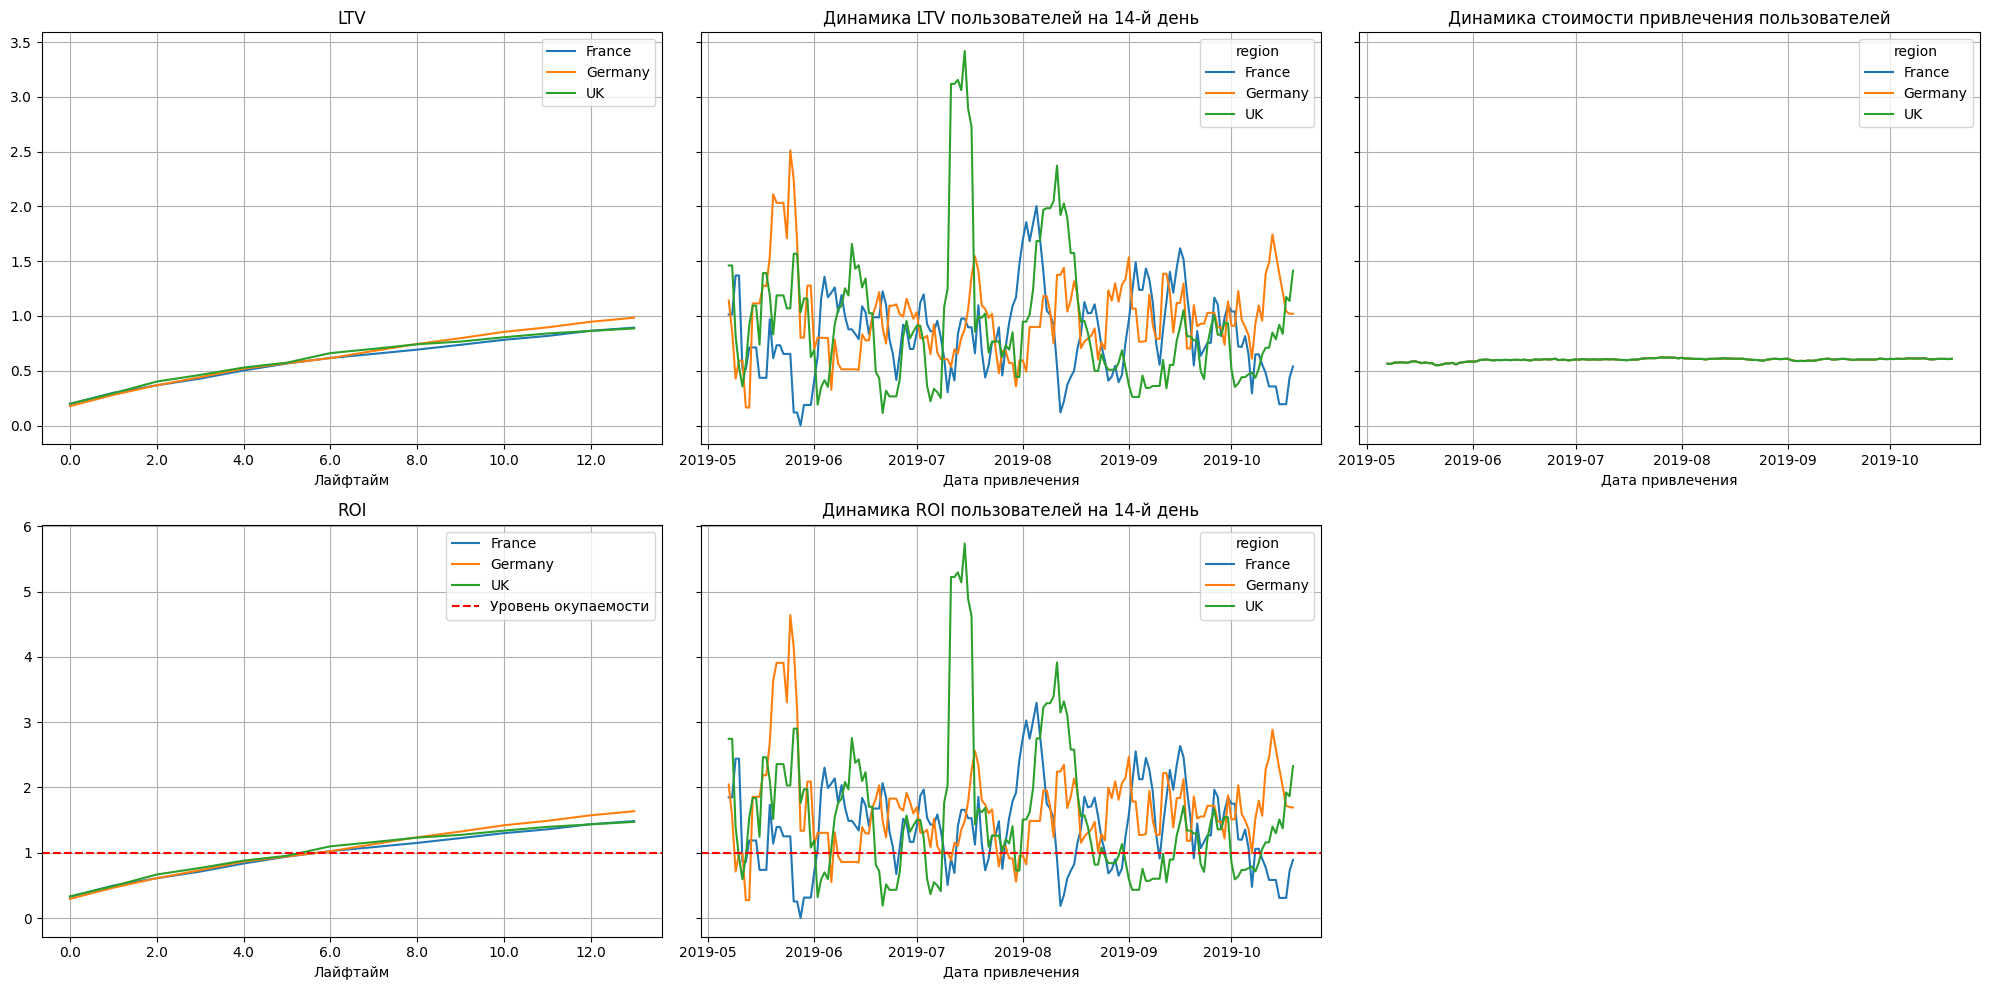

**Окупаемость OppleCreativeMedia в разных странах**

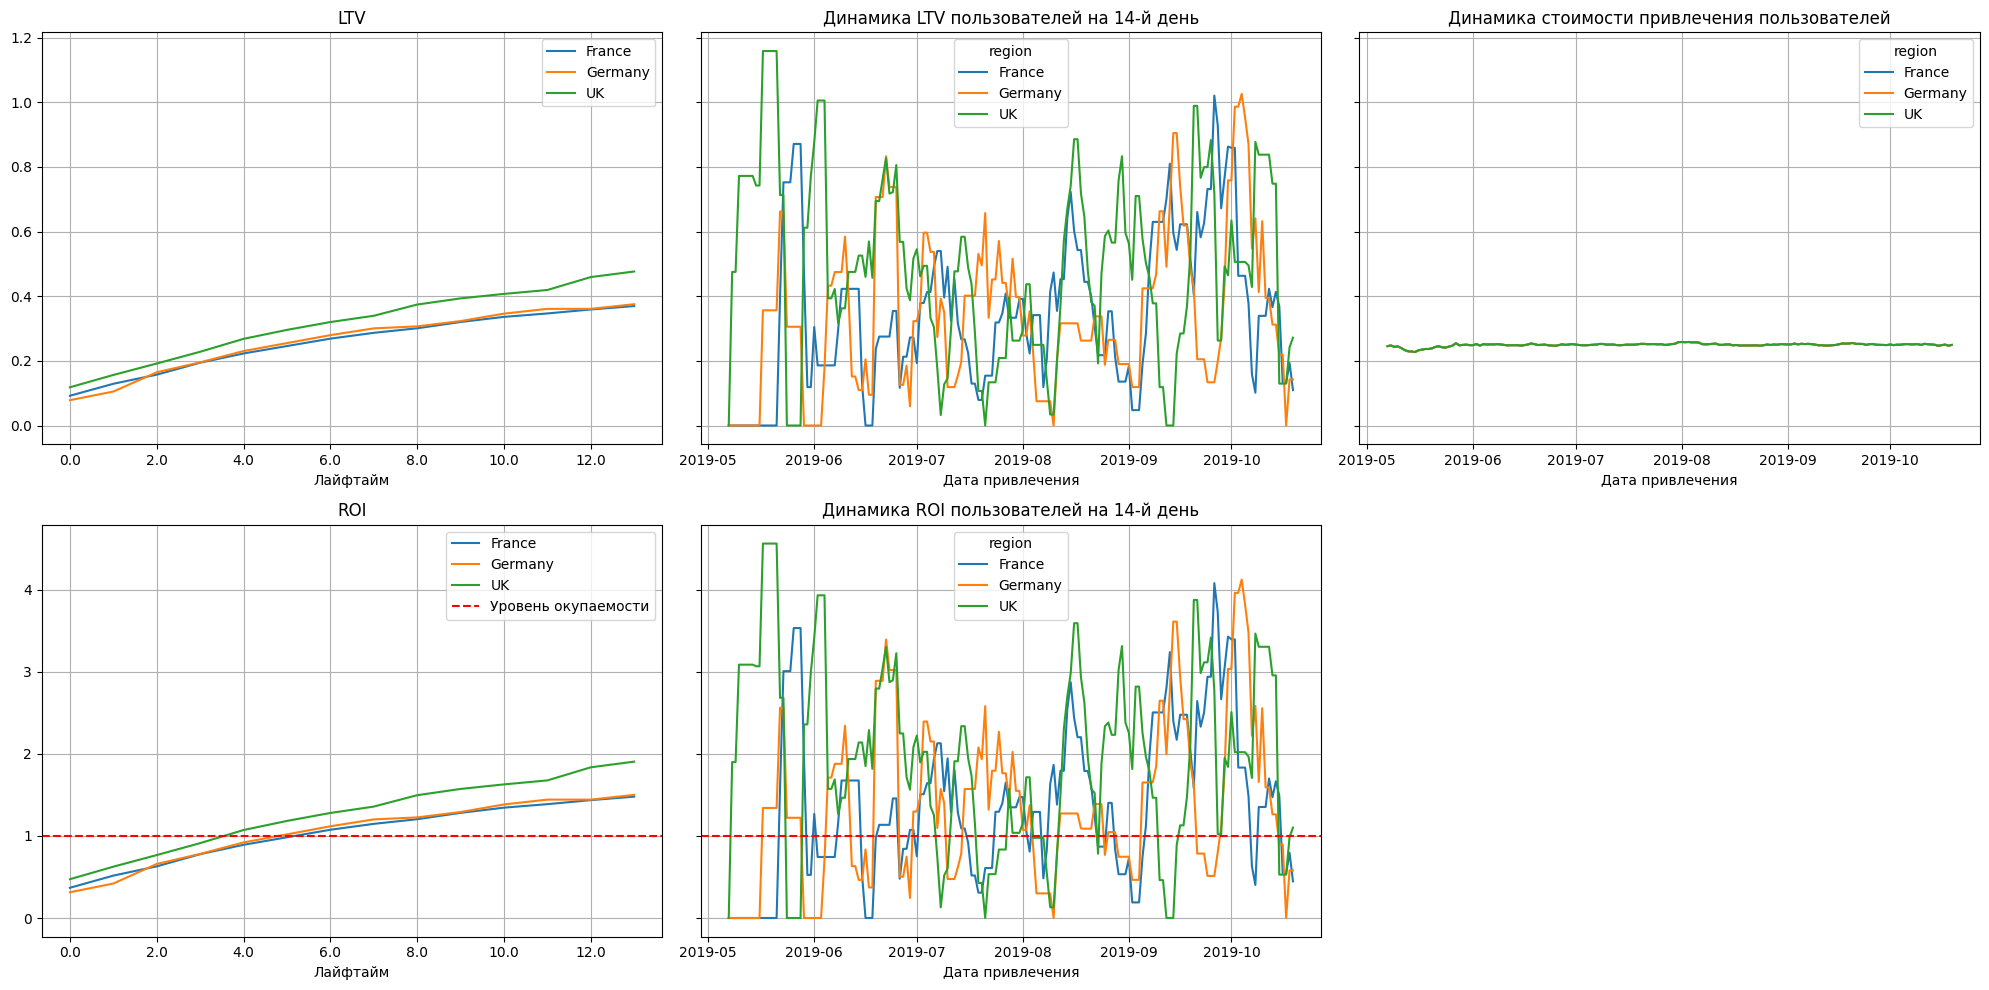

**Окупаемость lambdaMediaAds в разных странах**

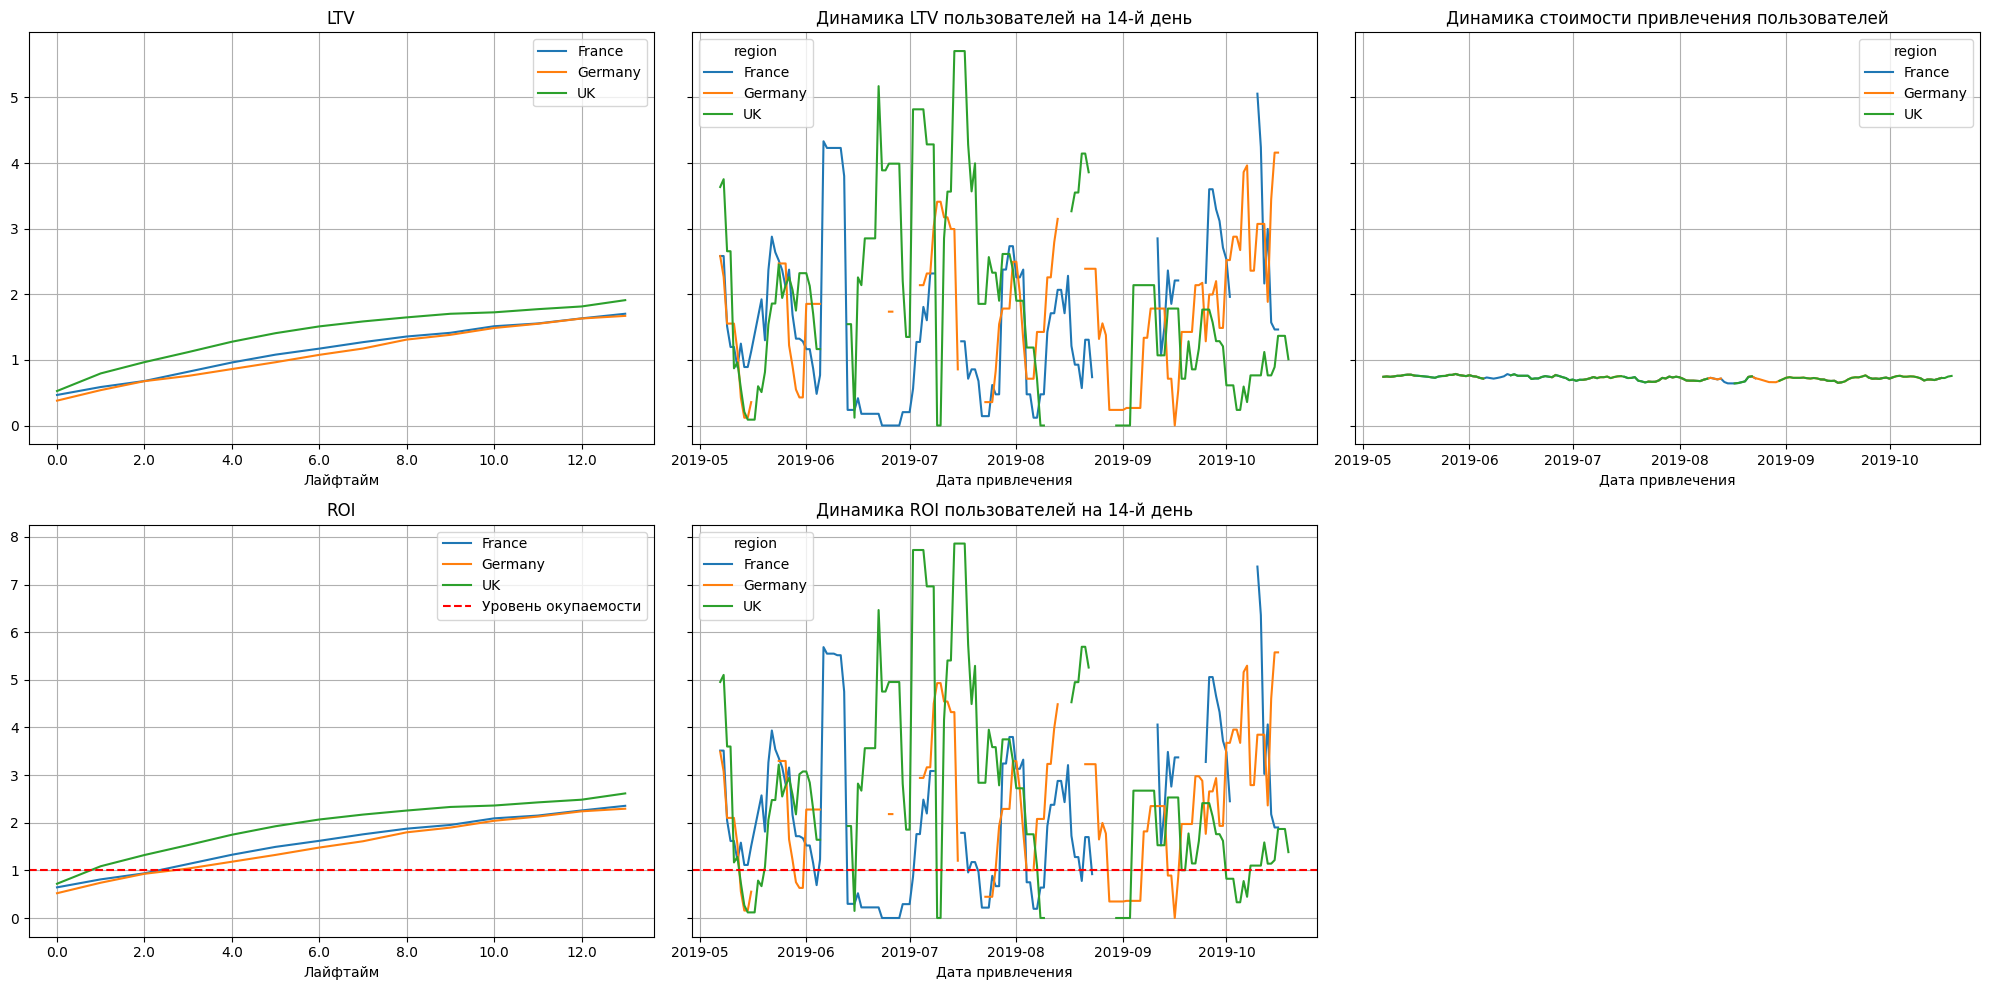

In [55]:
# расчет LTV и ROI с разбивкой по источникам
region_list = ['Germany', 'France', 'UK']
profiles_filtered = profiles.query('region in @region_list')
dimensions = ['region']

for channel in profiles_filtered['channel'].unique():   
    ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
        profiles_filtered.query('channel == @channel'), 
        df_orders, 
        observation_date, 
        horizon_days, 
        dimensions=dimensions
    )
    display(
        Markdown(
            f'**Окупаемость {channel} в разных странах**'
        ) 
    )
    # построение графиков с разбивкой по источникам
    plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7)

<div style="border:solid gray 1px; padding: 20px">

**Вывод:** 

1. Примерно с 4-го дня окупаются все рекламные источники, кроме TipTop, FaceBoom, AdNonSense
   
2. Хотя TipTop вторая по LTV, высокая и растущая САС не дает возможности ей окупаться. Вероятно есть причина (возможно техническая) по которой увеличение бюджета в этом источнике не приводит к увеличению пользователей

3. Низкое удержание и высокая стабильная САС не дает возможности окупаться и FaceBoom, AdNonSense

4. Рекомендации по источникам:
- сначала снизить САС в TipTop за счет увеличения конверсии из посетителей в новых пользователей
- далее снизить закупку пользователей неэффективных (удержание, LTV) сегментов в FaceBoom, AdNonSense
- выяснить причину, по которой в YRabbit произошло резкое снижение ROI с середины июля 2019

<a id="research_results"></a>
## Итоги исследования

Результаты исследования данных о пользователях развлекательного приложения Procrastinate Pro+ могут быть использованы продакт-менеджерами и маркетологами для выработки эффективных мероприятий, направленных на увеличение бизнеса. 

**Установлено**:


1. Реклама в целом не окупается:
- ROI без учета органических пользователей в конце второй недели около 80%
- органические пользователи "вытягивают" ROI к концу второй недели до 100% - но не дают возможность компании выйти в плюс
- САС растет с середины мая 2019 - рекламный бюджет растет, но нет соответствующего роста количества привлеченных пользователей

2. В период с 1 мая 2019 г. по 27 октября 2019 г. приложение использовали пользователи из **4 стран**: США, Великобритания, Франция, Германия. Около **67%** пользователей из США. И в США самая большая доля платящих пользователей - **6.9%**
   
3. Пользователи приложения чаще используют мобильные устройства, чем стационарные компьютеры. Платящие пользователи предпочитают устройства Apple

4. Источники пользователей:
- общая сумма расходов на маркетинг с 1 мая 2019 г. по 27 октября 2019 г.: **105497.3**
- более **82%** расходов приходится на два рекламных источника **TipTop** и **FaceBoom**
- на первом месте по количеству пользователей условно бесплатный источник "organic" - около **37%** пользователей
- рекламные источники FaceBoom, TipTop на втором и третьем местах -  приводят только пользователей из США с долей плательщиков **12,2%** и **9,6%** соответственно
- AdNonSense, lambdaMediaAds приводят пользователей только из Франции, Германии и Великобритании с долей плательщиков **11.34%** и **10.47%**
- самая высокая средняя стоимость привлечения одного пользователя (САС) **2,8** из **TipTop**
- у второго по расходам источника **FaceBoom** САС меньше в 2,5 раза
- у **AdNonSense** и **lambdaMediaAds** САС меньше в 2,8 и 3,9 раза соответственно

5. Конверсия пользователей в плательщики:
- пользователи из США конвертируются почти в 2 раза лучше, чем пользователи из других стран. Причём "отрыв" произошёл в течение июня
- четверка лидеров рекламных источников по конверсии: **FaceBoom, TipTop, AdNonSense и lambdaMediaAds**. Причем конверсия двух последних резко выросла с середины сентября примерно на 4 процентных пункта
- конверсия пользователей компьютеров РС ниже, чем у пользователей других устройств и снижается с начала июля  
  
6. Удержание пользователей:
- пользователи из США хуже **удерживаются**, чем пользователи из других стран.
- пользователи из рекламных источников FaceBoom (США), AdNonSense стабильно плохо удерживаются. Для платящих пользователей с этих источников удержание 14-го дня ниже, чем с других источников примерно на **20%**

7. Окупаемость по странам:
- пользователи из США не окупаются. Отрицательная динамика ROI к концу второй недели обратно пропорциональна росту САС
- пользователи из Франции, Германии и Великобритании окупаются начиная с шестого дня даже с учетом сезонности
- стоимость привлечения пользователей из США растет с июня, в то время как из других стран снизилась и практически неизменна
- LTV пользователей из США выше, чем у других стран. Но высокая САС не дает им окупаться

8. Окупаемость рекламных источников:
- примерно с 4-го дня окупаются все рекламные источники, кроме TipTop, FaceBoom, AdNonSense
- хотя TipTop вторая по LTV, высокая и растущая САС не дает возможности ей окупаться.
- низкое удержание не дает возможности окупаться и FaceBoom, AdNonSense

   
**Рекомендации**:

1. Устранение потерь:
- начать со снижения САС в TipTop за счет увеличения конверсии из посетителей в новых пользователей
- далее снизить закупку пользователей неэффективных (удержание, LTV) сегментов в FaceBoom, AdNonSense
- расследовать причину низкой конверсии пользователей компьютеров РС в плательщиков
- затем выяснить причину, по которой в YRabbit произошло резкое снижение ROI с середины июля 2019

2. Возможности:
- учитывая большое количество органических пользователей и самую низкую их конверсию в плательщиков **2,06%** имеет смысл подумать над возможностью увеличения конверсии с этого источника
- увеличить закупку пользователей из Франции, Германии и Великобритании с учетом эффективности рекламных источников
- провести дополнительное исследование доступных сегментов (пол, возраст, гео и т.п.) в TipTop, FaceBoom, AdNonSense

[Вернуться в начало](#intro)